# Simple Data Visualization <a name=top></a>

In this notebook, you will produce simple graphics using the `base` R installation. More sophisticated graphics are available _via_ the `ggplot2` library, whose syntax is outside the scope of the current workshop (although we will provide a few examples using it). More information can be found online. 


## TUTORIAL OUTLINE
1. [Scatterplots](#scatterplots) ([swiss](#scatterplot_swiss), [iris](#scatterplot_iris))
2. [Histograms and Bar Charts](#histbar) ([swiss](#histbar_swiss), [iris](#histbar_iris))
3. [Bubble Charts](#bubbles) ([Canadian 2011 demographic data](#bubbles_can2011), [Canadian CMA 2011 demographic data](#cma))
4. [Algae Blooms](#algae)
4. [Other Visualization Methods](#others)

---
[Back to top](#top)
## 1. SCATTERPLOTS <a id='scatterplots'></a> 
On a scatter plot, the features you study depend on the scale of interest:  
- for "big" patterns, look at: 
  - form and direction
  - strength
- for "small" patterns, look at:
  - deviations from the pattern
  - outliers



### 1.1 `swiss` dataset<a name=scatterplot_swiss></a>
We start with a built-in R dataset called `swiss`.

'data.frame':	47 obs. of  6 variables:
 $ Fertility       : num  80.2 83.1 92.5 85.8 76.9 76.1 83.8 92.4 82.4 82.9 ...
 $ Agriculture     : num  17 45.1 39.7 36.5 43.5 35.3 70.2 67.8 53.3 45.2 ...
 $ Examination     : int  15 6 5 12 17 9 16 14 12 16 ...
 $ Education       : int  12 9 5 7 15 7 7 8 7 13 ...
 $ Catholic        : num  9.96 84.84 93.4 33.77 5.16 ...
 $ Infant.Mortality: num  22.2 22.2 20.2 20.3 20.6 26.6 23.6 24.9 21 24.4 ...


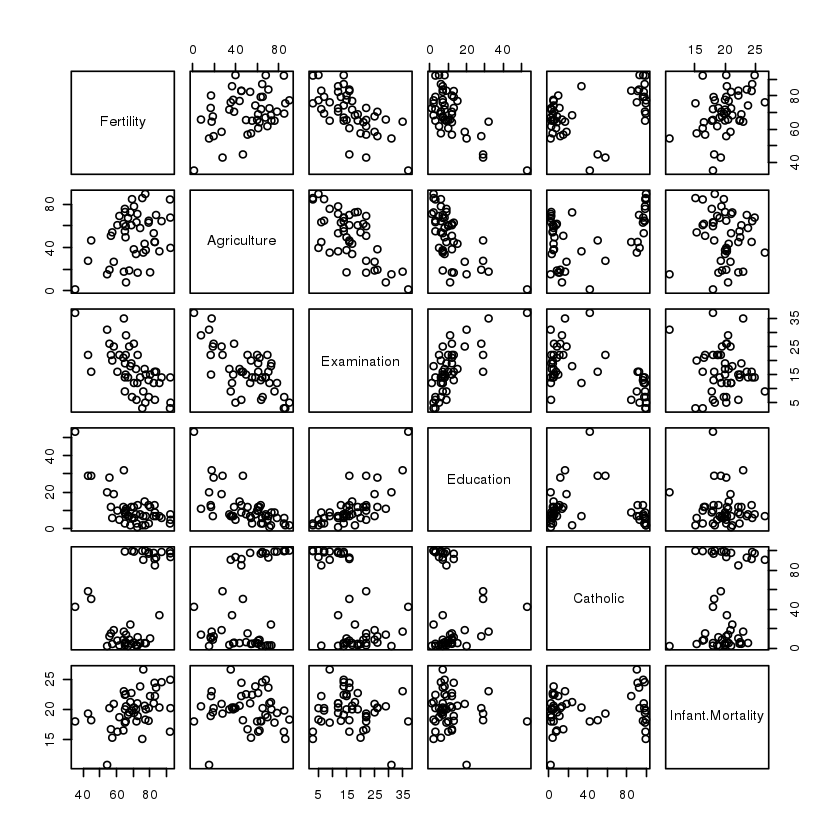

In [1]:
str(swiss) # structure of the swiss dataset
pairs(swiss) # scatter plot matrix for the swiss dataset

Let's focus on one specific pair: Fertility vs. Education

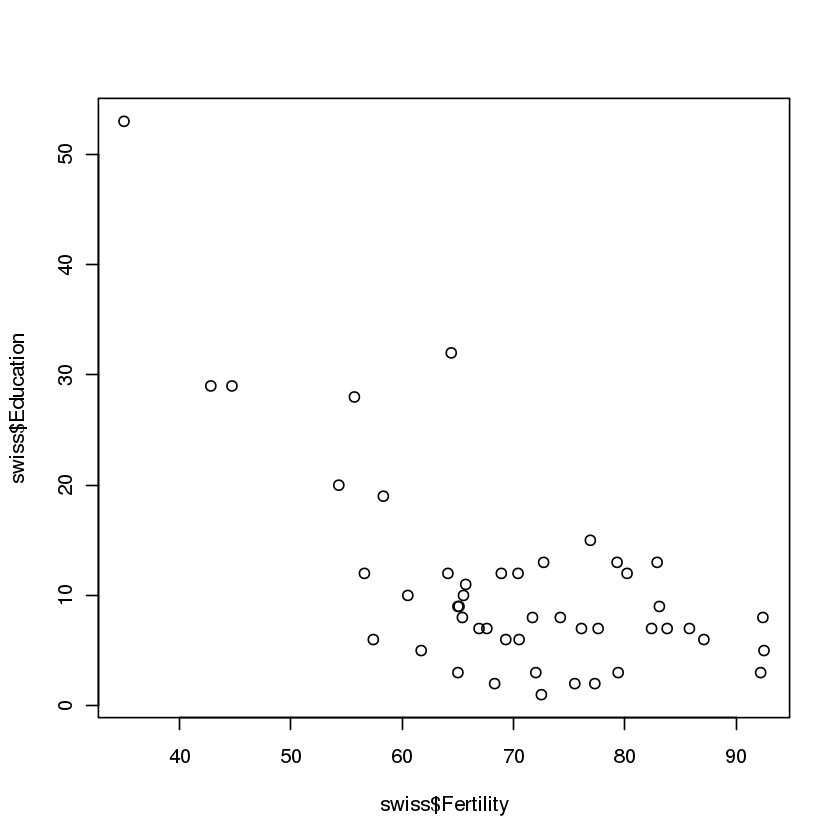

In [2]:
# raw plot
plot(swiss$Fertility, swiss$Education)

The same plot can be prettified and made more informative:

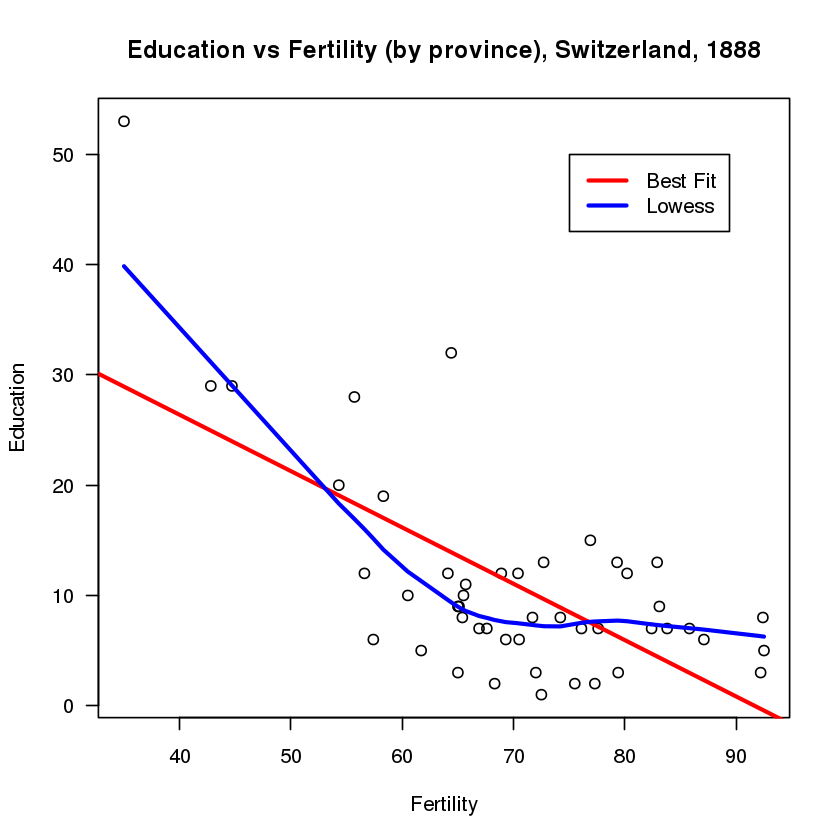

In [3]:
# add a title and axis labels
plot(swiss$Fertility, swiss$Education, xlab="Fertility", ylab="Education", main="Education vs Fertility (by province), Switzerland, 1888", las=1)

# add the line of best fit (in red)
abline(lm(swiss$Education~swiss$Fertility), col="red", lwd=2.5) 

# add the smoothing lowess curve (in blue)
lines(lowess(swiss$Fertility,swiss$Education), col="blue", lwd=2.5) 

# add a legend
legend(75,50, c("Best Fit","Lowess"), lty=c(1,1), lwd=c(2.5,2.5),col=c("red","blue")) 

Compare that graph with the one found below: 

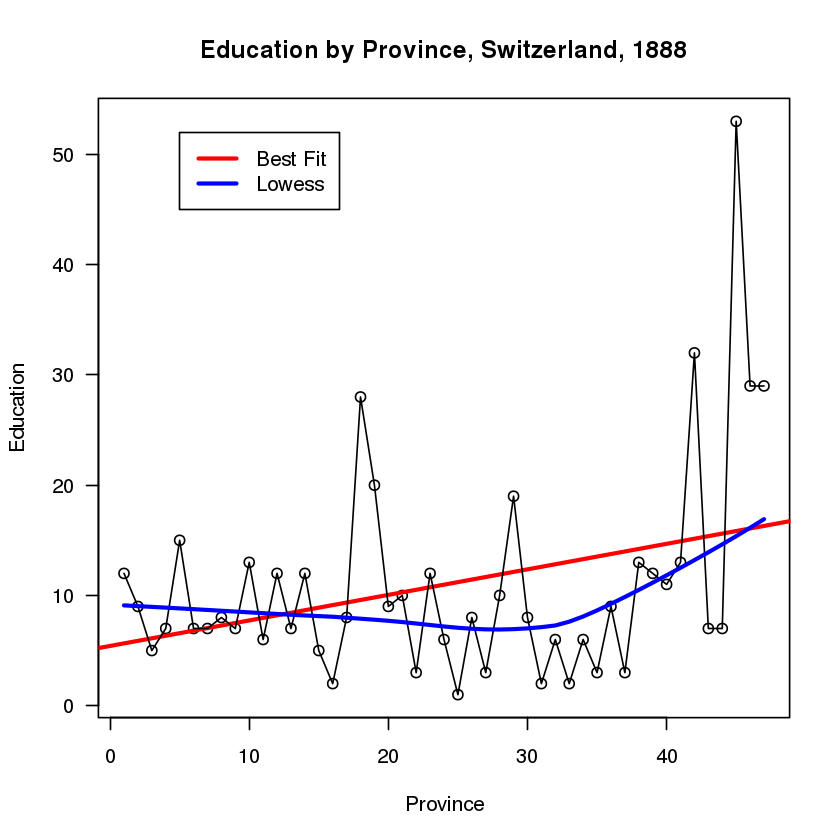

In [4]:
plot(swiss$Education, xlab="Province", ylab="Education", main="Education by Province, Switzerland, 1888", las=1)
abline(lm(swiss$Education~row(swiss)[,1]), col="red", lwd=2.5) 
lines(swiss$Education)
lines(lowess(row(swiss)[,1],swiss$Education), col="blue", lwd=2.5) 
legend(5,52, c("Best Fit","Lowess"), lty=c(1,1), lwd=c(2.5,2.5),col=c("red","blue")) 

So we can get an actual graph here, but ... why doesn't it actually make sense to produce that specific graph?

The take-away here is that being able to produce a graph doesn't guarantee that it will be useful or meaningful in any way.

Let's see what the unadorned scatter plots look like with `ggplot2`.

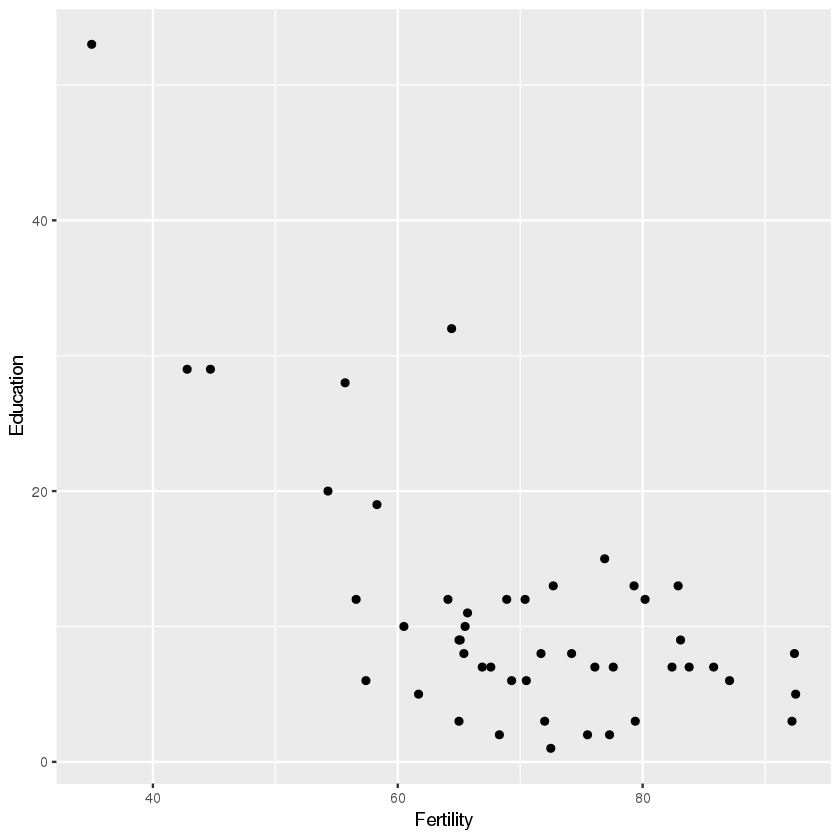

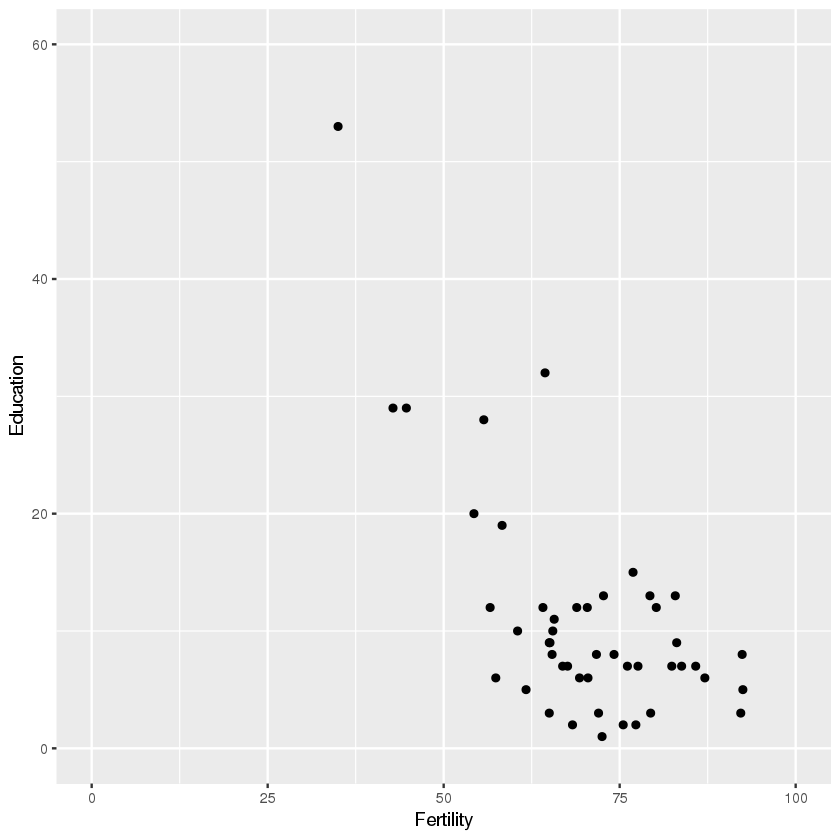

In [5]:
## Again, with ggplot2
library(ggplot2)
qplot(Fertility, Education, data=swiss)
qplot(Fertility, Education, xlim=c(min(0,10*floor(min(swiss$Fertility)/10)),10*ceiling(max(swiss$Fertility)/10)), ylim=c(min(0,10*floor(min(swiss$Education)/10)),10*ceiling(max(swiss$Education)/10)), data=swiss)

---
### 1.2 `iris` dataset<a name=scatterplot_iris></a>
Let's do the same thing for the built-in `iris` dataset.

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

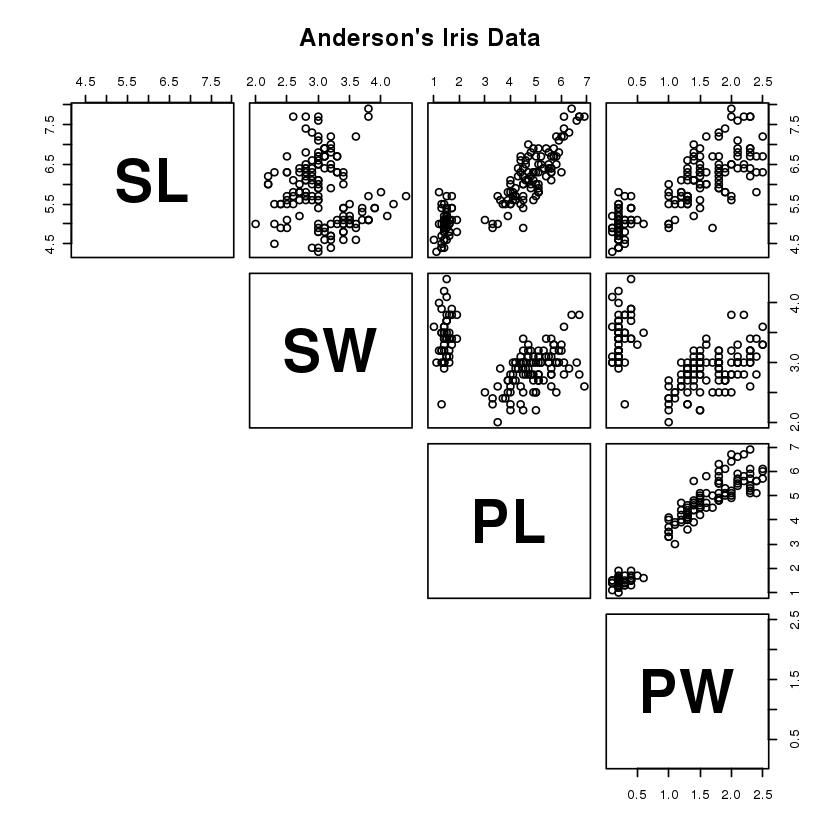

In [6]:
str(iris) # structure of the dataset
summary(iris) # information on the distributions for each feature
?iris # information on the dataset itself

# scatter plot matrix on which the lower panel has been removed due to redundancy
pairs(iris[1:4], main = "Anderson's Iris Data", pch = 21, lower.panel=NULL, labels=c("SL","SW","PL","PW"), font.labels=2, cex.labels=4.5) 

We can compare the sepal width and length variables in a manner similar to what we did with the `swiss` dataset.

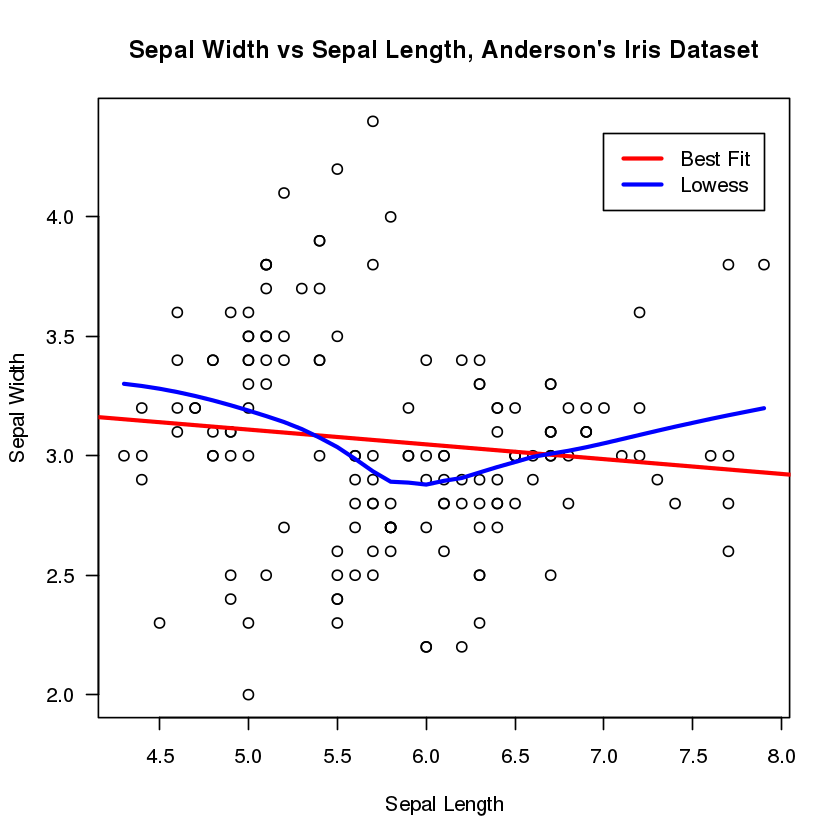

In [7]:
## Iris 1
plot(iris$Sepal.Length, iris$Sepal.Width, xlab="Sepal Length", ylab="Sepal Width", main="Sepal Width vs Sepal Length, Anderson's Iris Dataset", las=1, bg=c("yellow","black","green")[unclass(iris$Species)])
abline(lm(iris$Sepal.Width~iris$Sepal.Length), col="red", lwd=2.5) 
lines(lowess(iris$Sepal.Length,iris$Sepal.Width), col="blue", lwd=2.5) 
legend(7,4.35, c("Best Fit","Lowess"), lty=c(1,1), lwd=c(2.5,2.5),col=c("red","blue")) 

There does not seem to be a very strong relationship between these variables. What can we say about sepal length and petal length? 

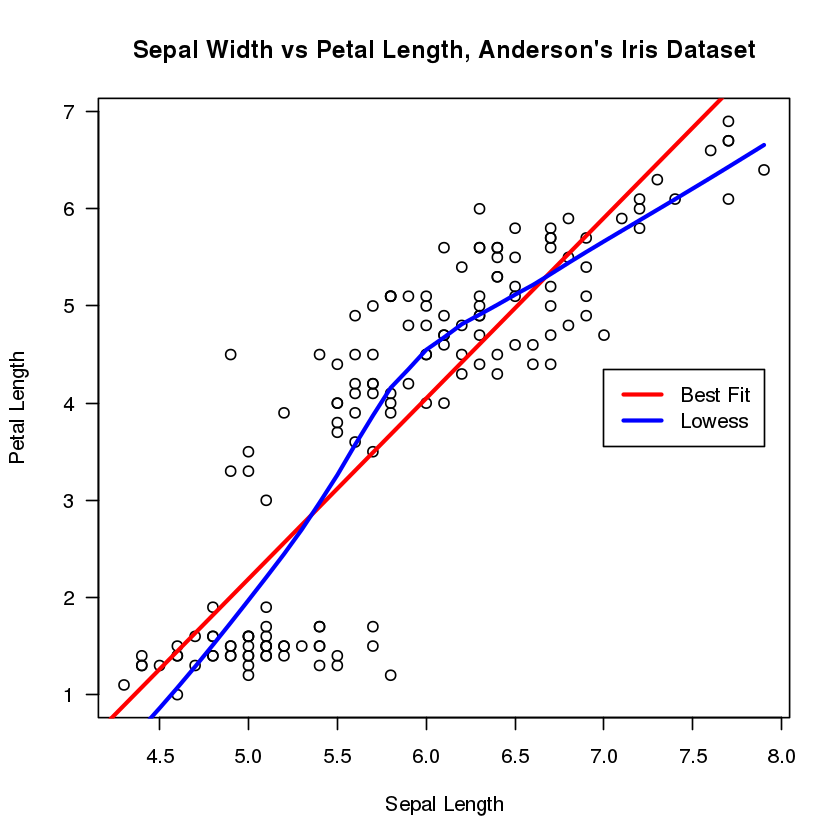

In [8]:
## Iris 2
plot(iris$Sepal.Length, iris$Petal.Length, xlab="Sepal Length", ylab="Petal Length", main="Sepal Width vs Petal Length, Anderson's Iris Dataset", las=1)
abline(lm(iris$Petal.Length~iris$Sepal.Length), col="red", lwd=2.5) 
lines(lowess(iris$Sepal.Length,iris$Petal.Length), col="blue", lwd=2.5) 
legend(7,4.35, c("Best Fit","Lowess"), lty=c(1,1), lwd=c(2.5,2.5),col=c("red","blue")) 

Visually, the relationship is striking: the line seems to have a slope of 1! But notice that the axes are unevenly scaled, and have been cutoff away from the origin. The following graph gives a better idea of the situation.

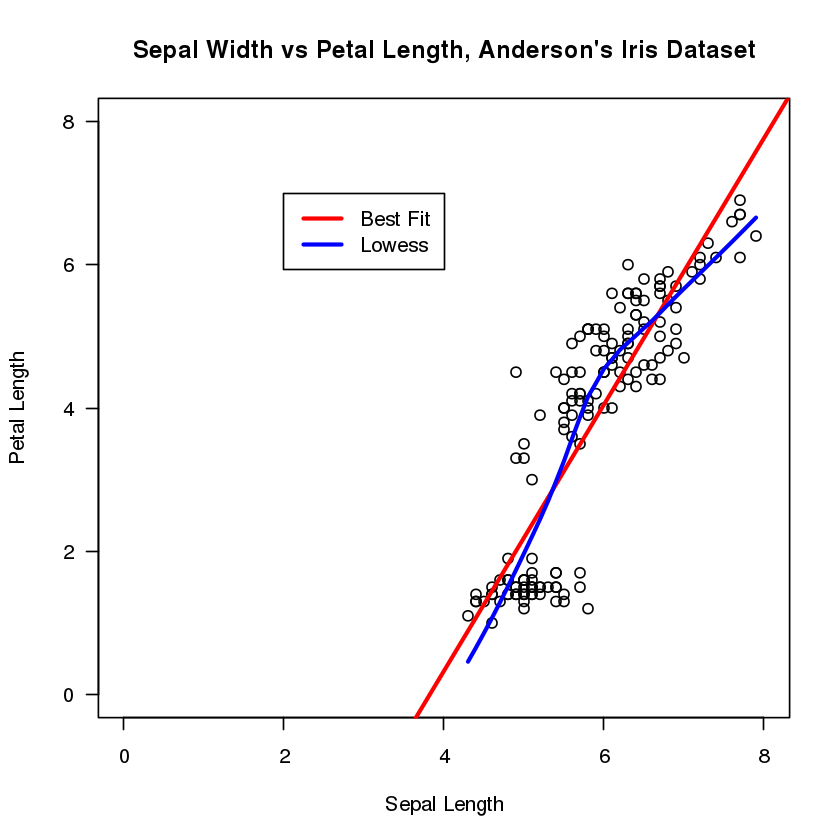

In [9]:
## Iris 3
plot(iris$Sepal.Length, iris$Petal.Length, xlab="Sepal Length", ylab="Petal Length", main="Sepal Width vs Petal Length, Anderson's Iris Dataset", xlim=c(0,8), ylim=c(0,8), las=1)
abline(lm(iris$Petal.Length~iris$Sepal.Length), col="red", lwd=2.5) 
lines(lowess(iris$Sepal.Length,iris$Petal.Length), col="blue", lwd=2.5) 
legend(2,7, c("Best Fit","Lowess"), lty=c(1,1), lwd=c(2.5,2.5),col=c("red","blue")) 

A relationship is still present, but it is **affine**, not linear as could have been guessed by naively looking at the original graph. 

---
Colour can also be used to highlight various data elements.

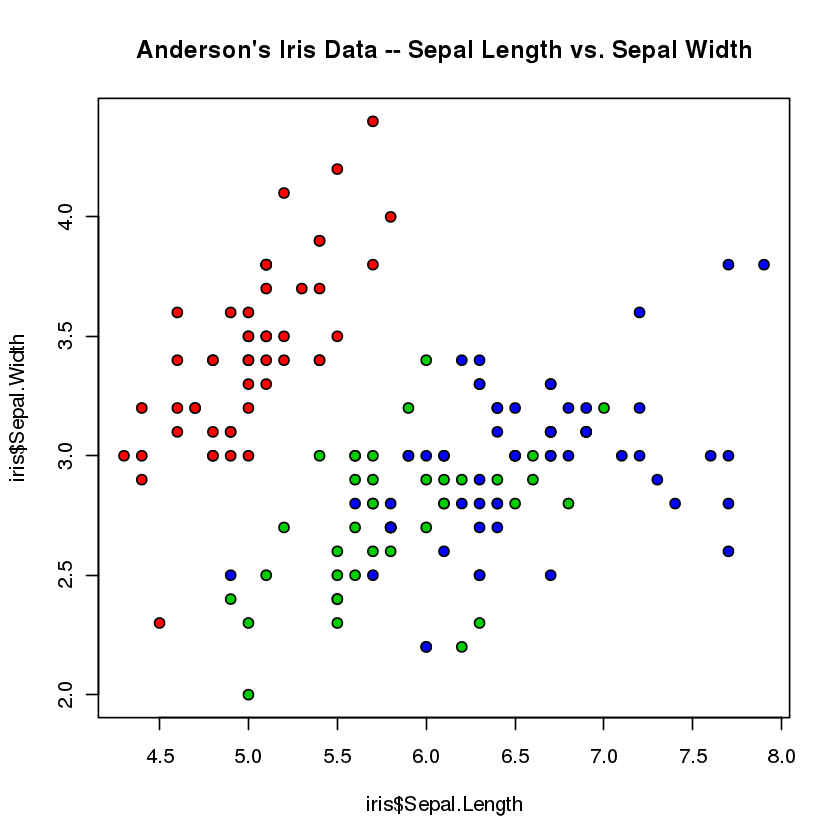

In [10]:
# colour each observation differently according to its species
plot(iris$Sepal.Length, iris$Sepal.Width, pch=21, bg=c("red","green3","blue")[unclass(iris$Species)], main="Anderson's Iris Data -- Sepal Length vs. Sepal Width", xlim=)

This can be done on all scatterplots concurrently using `pairs`.

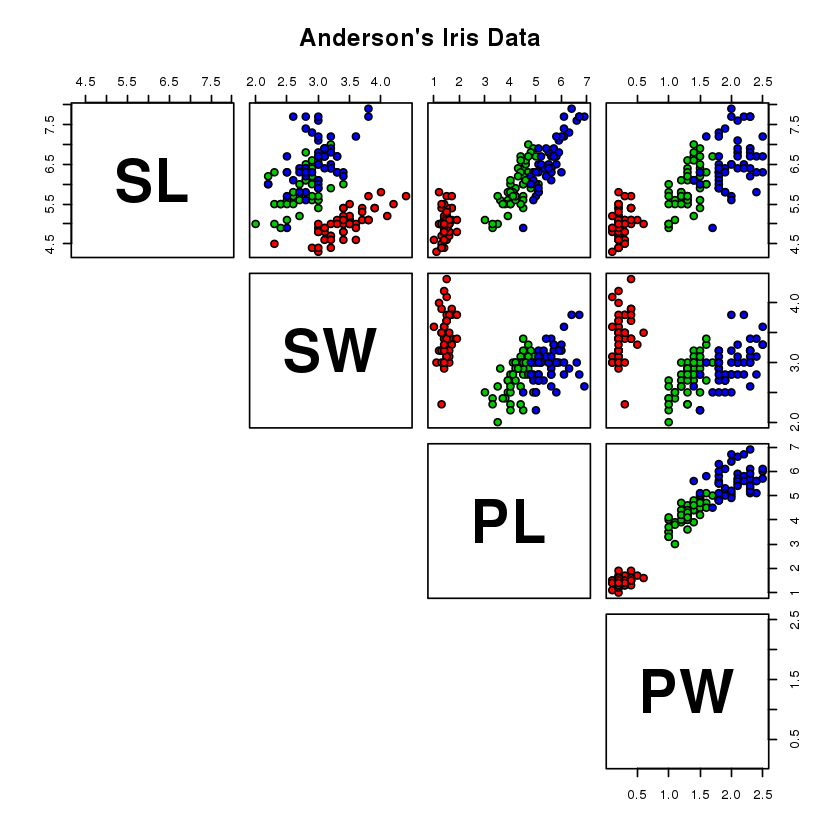

In [11]:
# scatterplot matrix with species membership
pairs(iris[1:4], main = "Anderson's Iris Data", pch = 21, bg = c("red", "green3", "blue")[unclass(iris$Species)], lower.panel=NULL, labels=c("SL","SW","PL","PW"), font.labels=2, cex.labels=4.5)

---
The redundancy in the scatter plot matrix can be used to display other data elements as well: `GGally` allows for **feature distributions** in the diagonal entries, and **correlations between pairs of variables** and **density plots** in the redundant panels (among other things). Be weary of utilizing too many colours or features in these plots, however. They can easily become too difficult to read to provide any meaningful insights.

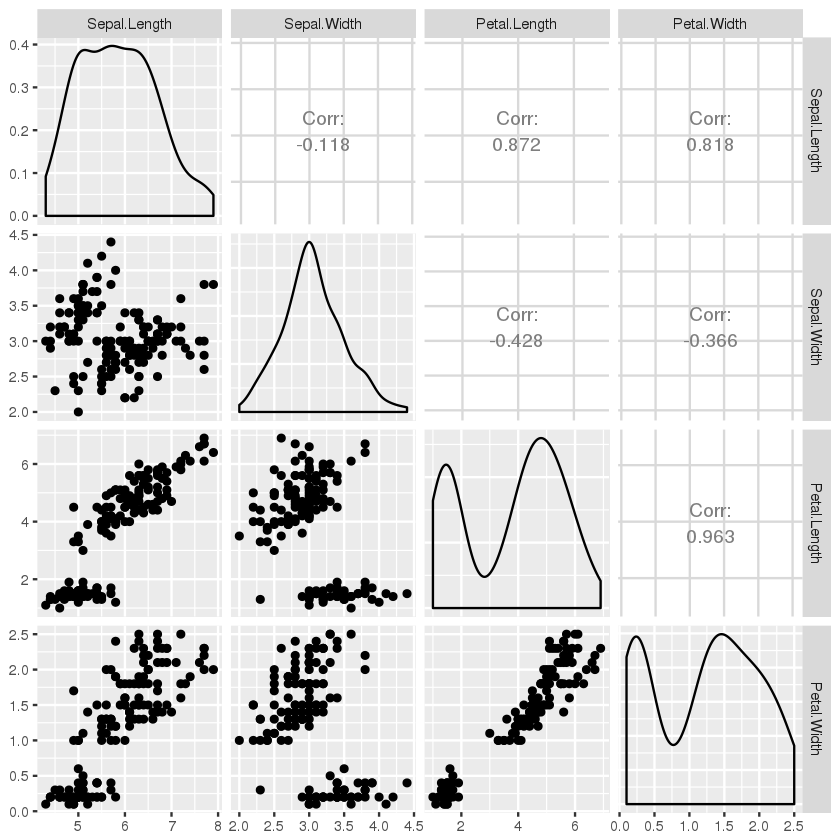

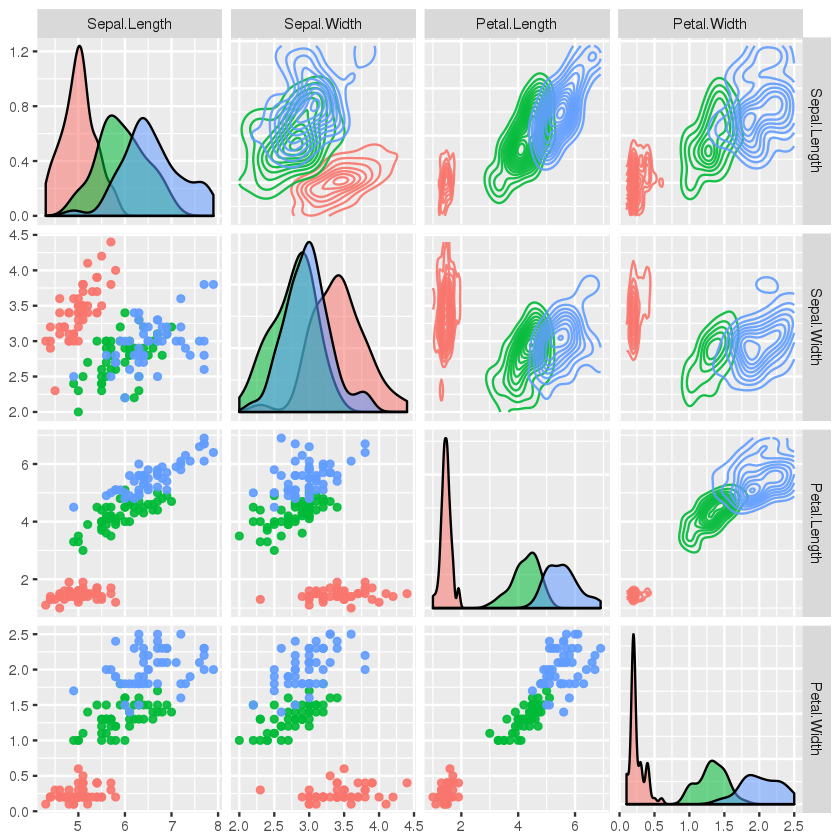

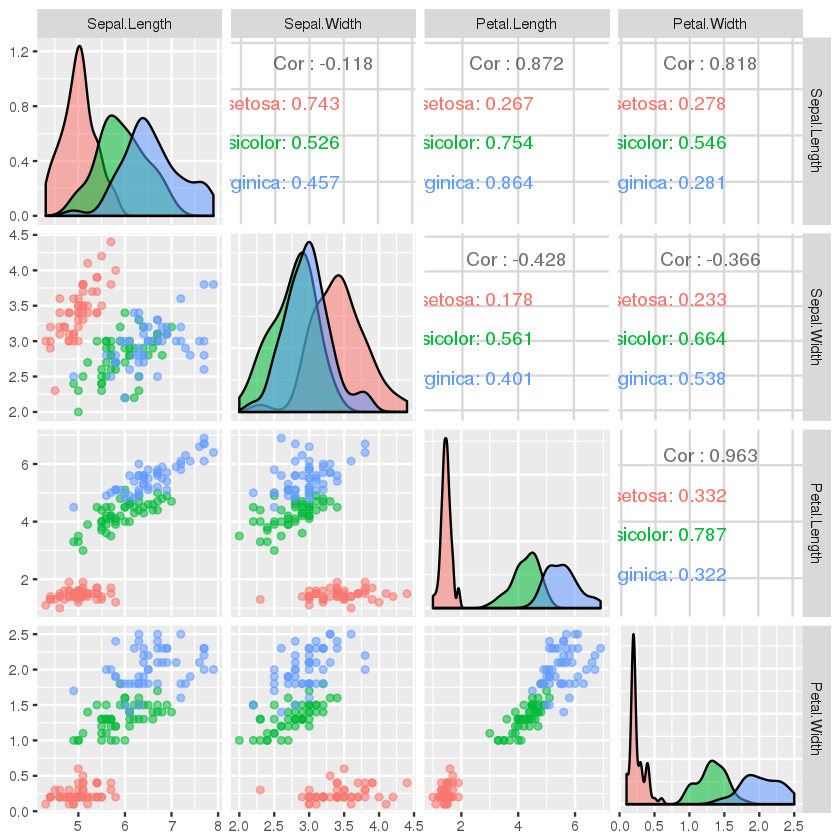

In [12]:
library(GGally)
ggpairs(data=iris, columns=1:4)
ggpairs(iris, 1:4, mapping = ggplot2::aes(color = Species, alpha = 0.5), 
        diag = list(continuous = wrap("densityDiag")), 
        lower=list(continuous = wrap("points", alpha=0.9)),
        upper=list(continuous = wrap("density", alpha = 0.9)))

ggpairs(iris, 1:4, mapping = ggplot2::aes(colour = Species, alpha=0.4), diag = list(continuous = wrap("densityDiag")))

---
[Back to top](#top)
## 2. HISTOGRAM AND BAR CHARTS <a name=histbar></a>
In histograms or frequency charts, be on the lookout for bin size effects.

### 2.1 `swiss` dataset <a name=histbar_swiss></a>
For instance, what does the distribution of the `Education` variable in the `swiss` dataset look like? 

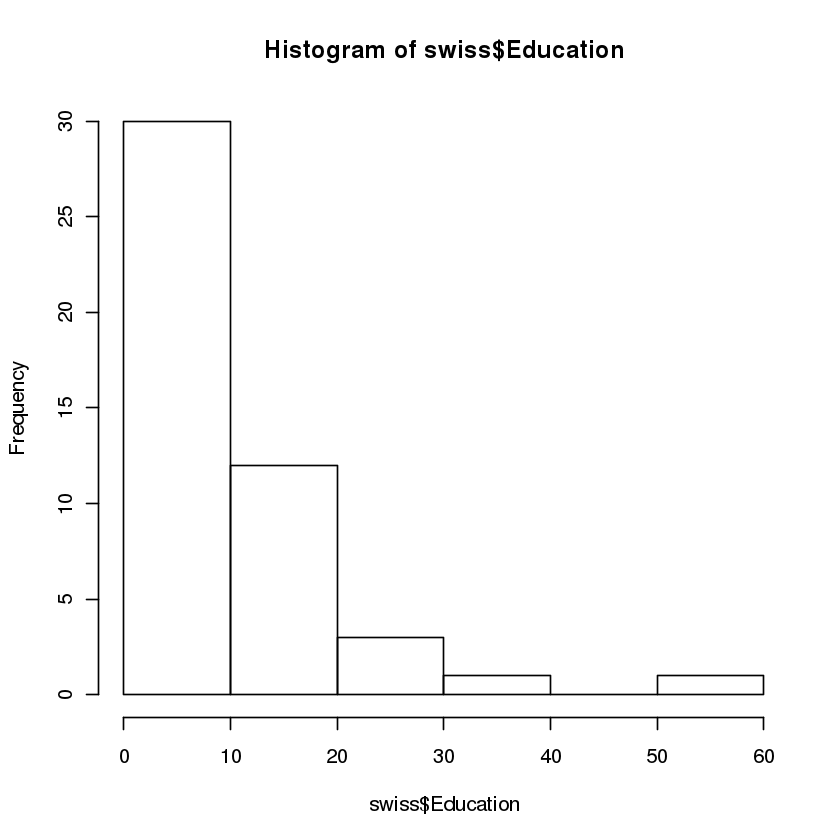

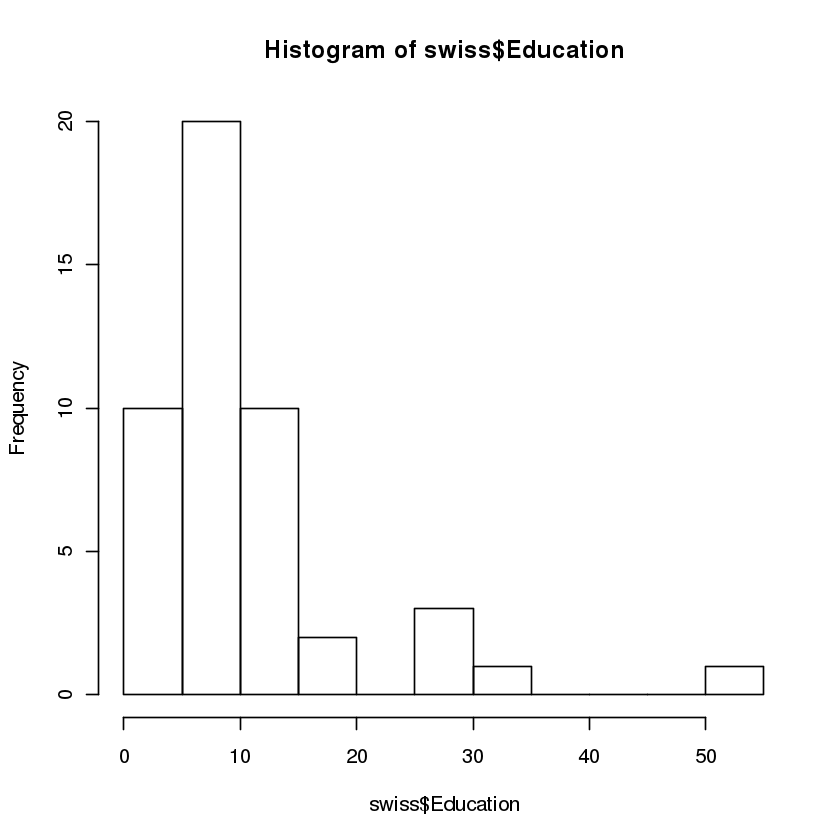

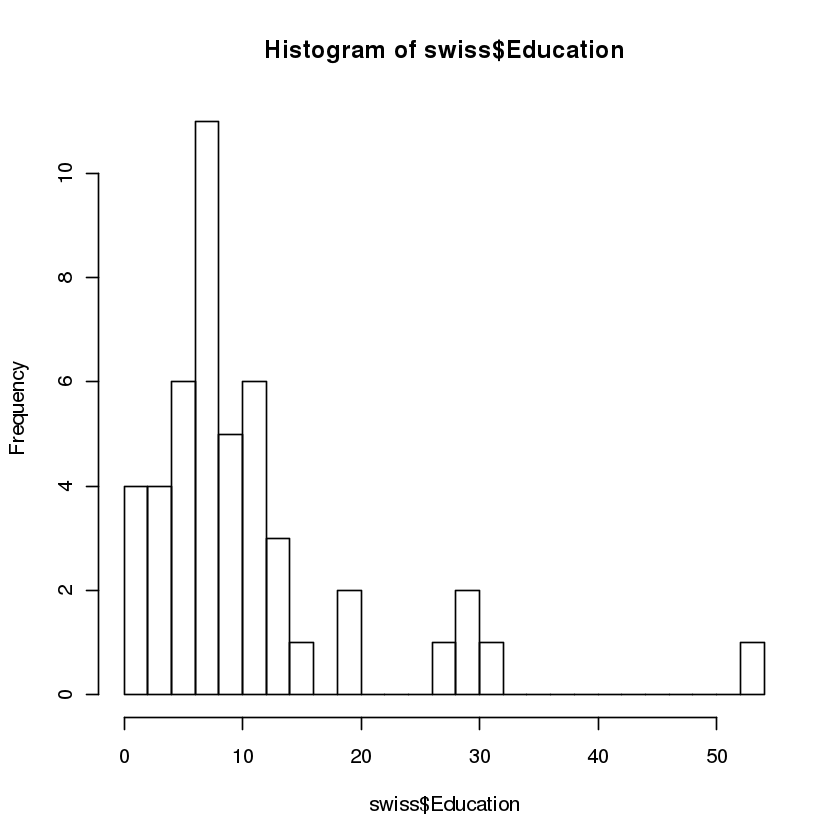

In [13]:
## Histogram/Bar Charts
hist(swiss$Education)   # default number of bins
hist(swiss$Education, breaks=10)   # with 10 bins
hist(swiss$Education, breaks=20)   # with 20 bins

The distribution pattern is distincly different with 10 and 20 bins. Don't get too carried away, however: too many bins may end up maskig trends if the dataset isn't large enough. 


We can look for best fits for various parametric distributions:

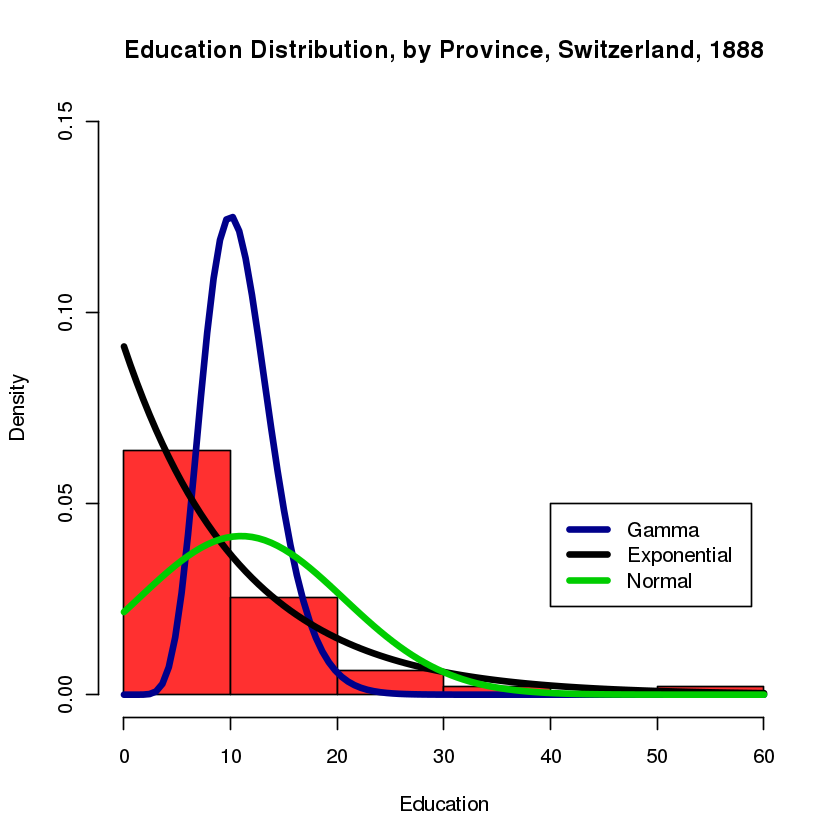

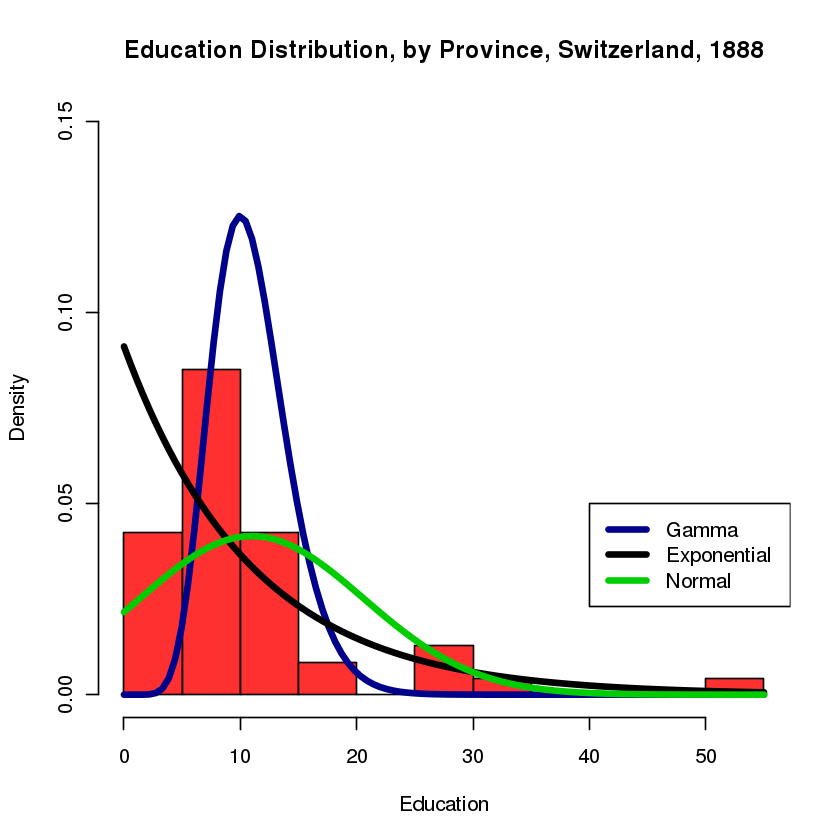

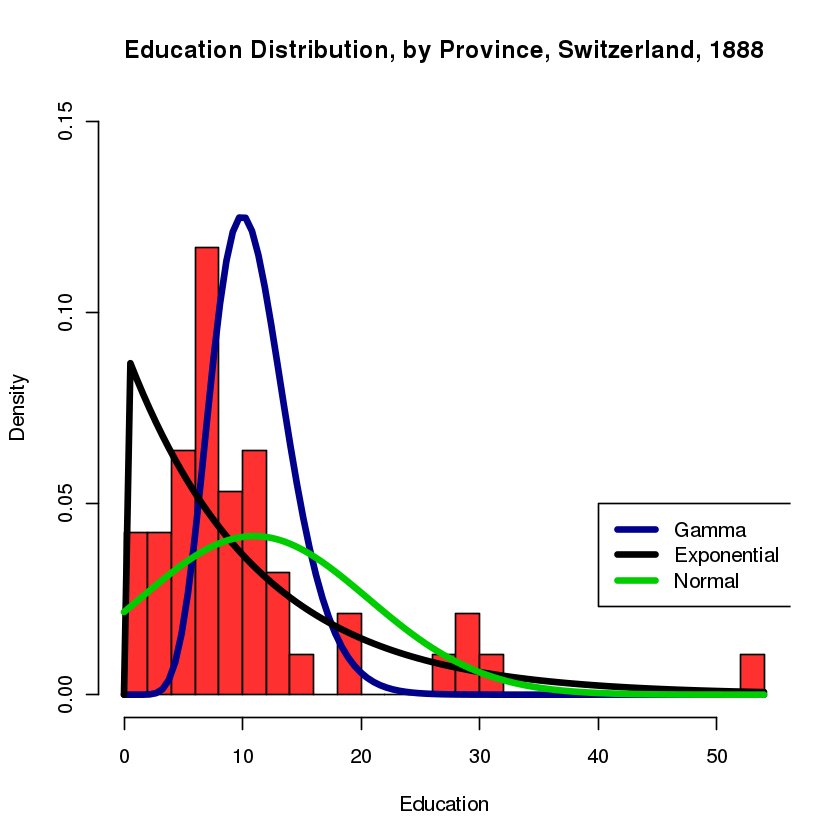

In [14]:
#Swiss 1 - default number of bine
hist(swiss$Education, freq=FALSE, xlab="Education",main="Education Distribution, by Province, Switzerland, 1888", col="firebrick1", ylim=c(0,0.15))
curve(dgamma(x,shape=mean(swiss$Education)),add=TRUE, col="darkblue", lwd=4) # fit a gamma distribution
curve(dexp(x,rate=1/mean(swiss$Education)),add=TRUE, col="black", lwd=4) # fit an exponential distribution
curve(dnorm(x,mean=mean(swiss$Education),sd=sd(swiss$Education)), add=TRUE, col="green3", lwd=4) # fit a normal distribution
legend(40,0.05, c("Gamma","Exponential","Normal"), lty=c(1,1), lwd=c(4,4),col=c("darkblue","black", "green3")) 

# Swiss 2 - 10 bins
hist(swiss$Education, breaks=10, freq=FALSE, xlab="Education",main="Education Distribution, by Province, Switzerland, 1888", col="firebrick1", ylim=c(0,0.15))
curve(dgamma(x,shape=mean(swiss$Education)),add=TRUE, col="darkblue", lwd=4)
curve(dexp(x,rate=1/mean(swiss$Education)),add=TRUE, col="black", lwd=4)
curve(dnorm(x,mean=mean(swiss$Education),sd=sd(swiss$Education)), add=TRUE, col="green3", lwd=4)
legend(40,0.05, c("Gamma","Exponential","Normal"), lty=c(1,1), lwd=c(4,4),col=c("darkblue","black", "green3")) 

# Swiss 3 - 20 bins
hist(swiss$Education, breaks=20, freq=FALSE, xlab="Education",main="Education Distribution, by Province, Switzerland, 1888", col="firebrick1", ylim=c(0,0.15))
curve(dgamma(x,shape=mean(swiss$Education)),add=TRUE, col="darkblue", lwd=4)
curve(dexp(x,rate=1/mean(swiss$Education)),add=TRUE, col="black", lwd=4)
curve(dnorm(x,mean=mean(swiss$Education),sd=sd(swiss$Education)), add=TRUE, col="green3", lwd=4)
legend(40,0.05, c("Gamma","Exponential","Normal"), lty=c(1,1), lwd=c(4,4),col=c("darkblue","black", "green3")) 

With a small number of bins, the exponential distribution seems like a good fit, visually. With a larger number of bins, neither of the three families seems particularly well-advised. 

---
### 2.2 `iris` dataset <a name=histbar_iris></a>
Can you figure out what is happening with these visualizations of the `iris` dataset?

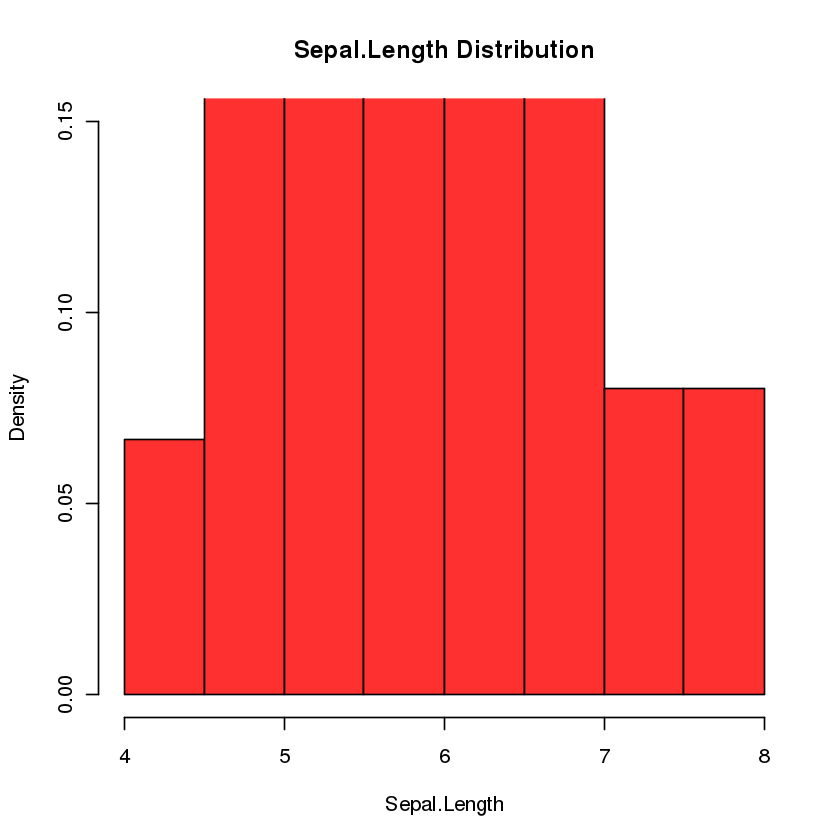

In [15]:
hist(iris$Sepal.Length, freq=FALSE, xlab="Sepal.Length",main="Sepal.Length Distribution", col="firebrick1", ylim=c(0,0.15))
# what happens if you replace freq=FALSE with freq=TRUE?

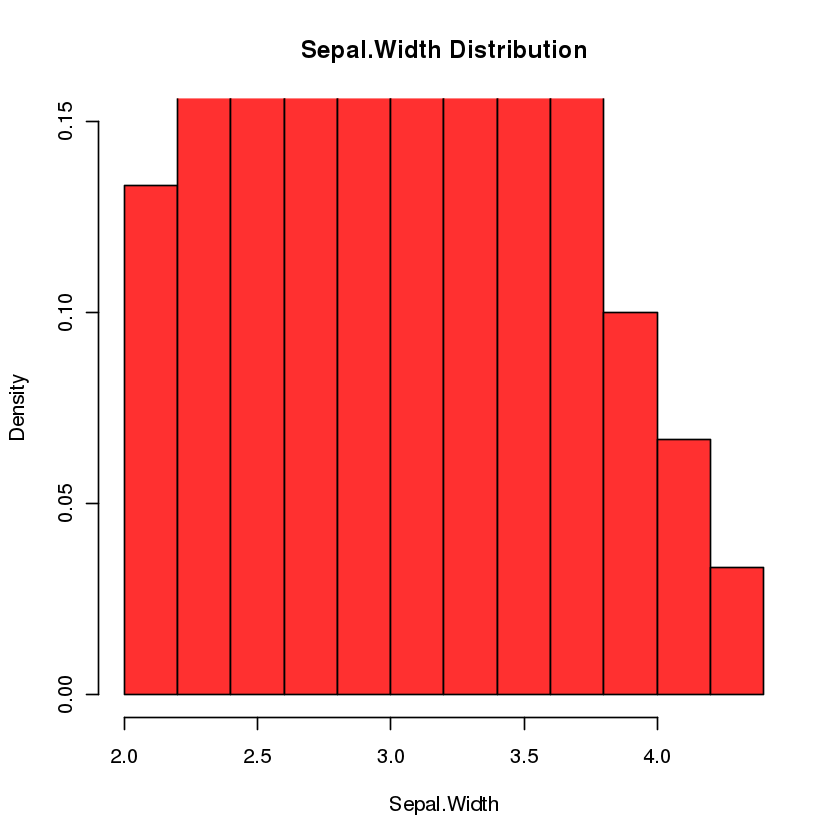

In [16]:
# Another feature
hist(iris$Sepal.Width, freq=FALSE, xlab="Sepal.Width",main="Sepal.Width Distribution", col="firebrick1", ylim=c(0,0.15))

Histograms (1D data representations) can be combined with scatterplots (2D data representations) to provide **marginal** information. 

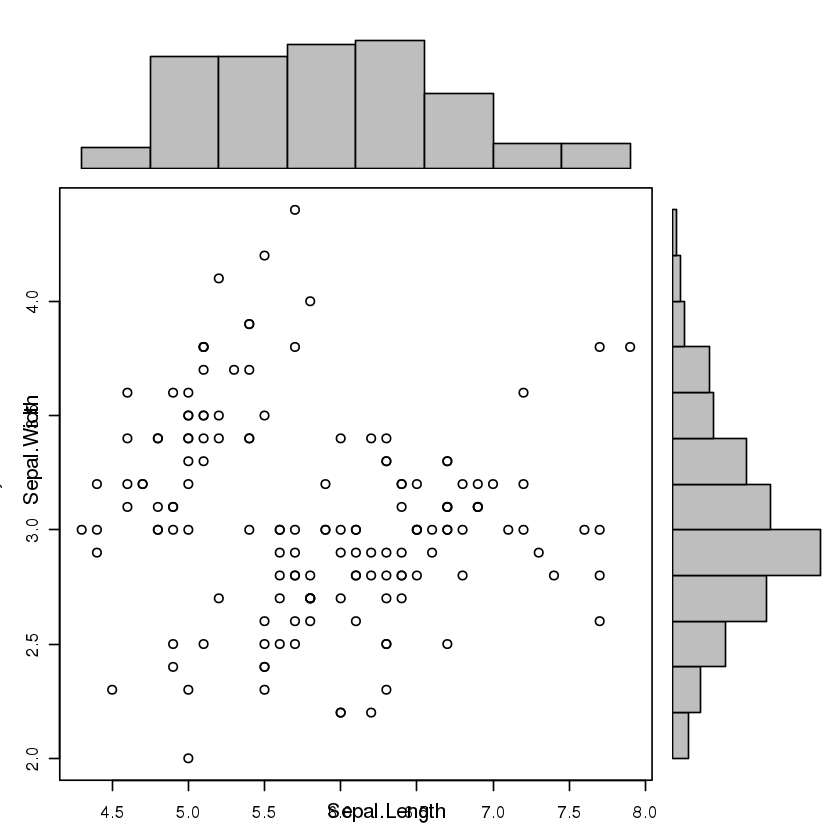

In [17]:
# create our own function (see R-blogger's scatterhist function)
scatterhist = function(x, y, xlab="", ylab=""){
  zones=matrix(c(2,0,1,3), ncol=2, byrow=TRUE)
  layout(zones, widths=c(4/5,1/5), heights=c(1/5,4/5))
  xhist = hist(x, plot=FALSE)
  yhist = hist(y, plot=FALSE)
  top = max(c(xhist$counts, yhist$counts))
  par(mar=c(3,3,1,1))
  plot(x,y)
  par(mar=c(0,3,1,1))
  barplot(xhist$counts, axes=FALSE, ylim=c(0, top), space=0)
  par(mar=c(3,0,1,1))
  barplot(yhist$counts, axes=FALSE, xlim=c(0, top), space=0, horiz=TRUE)
  par(oma=c(3,3,0,0))
  mtext(xlab, side=1, line=1, outer=TRUE, adj=0, 
    at=.8 * (mean(x) - min(x))/(max(x)-min(x)))
  mtext(ylab, side=2, line=1, outer=TRUE, adj=0, 
    at=(.8 * (mean(y) - min(y))/(max(y) - min(y))))
}

ds = iris
with(ds, scatterhist(iris$Sepal.Length, iris$Sepal.Width, xlab="Sepal.Length", ylab="Sepal.Width"))

---
[Back to top](#top)
## 3. BUBBLE CHARTS <a name=bubbles></a>
Bubble charts are a neat way to show at least 3 variables on the same 2D display. The location of the bubbles' centre takes care of 2 variables: size, colour, and shape of bubbles can also be added to represent different data elements. 

### 3.1 Canadian 2011 demographic dataset <a name=bubbles_can2011></a>
For this example, we'll look at demographic data regarding Canada's CMA and CA (from StatsCan).

In [18]:
can.2011=read.csv("Data/Canada2011.csv", head=TRUE) # import the data
head(can.2011) # take a look at the first 6 entries
str(can.2011) # take a look at the structure of the data
summary(can.2011[,3:12], maxsum=13) # provide a distribution information for features 3 to 12, allowing for up to 13 factors in the categorical distributions 

Geographic.code,Geographic.name,Province,Region,Type,pop_2011,log_pop_2011,pop_rank_2011,priv_dwell_2011,occ_private_dwell_2011,occ_rate_2011,med_total_income_2011
1,St. John's,NL,Atlantic,CMA,196966,5.294391,20,84542,78960,0.9339736,33420
5,Bay Roberts,NL,Atlantic,CA,10871,4.036269,147,4601,4218,0.9167572,24700
10,Grand Falls-Windsor,NL,Atlantic,CA,13725,4.137512,128,6134,5723,0.9329964,26920
15,Corner Brook,NL,Atlantic,CA,27202,4.434601,94,11697,11110,0.9498162,27430
105,Charlottetown,PE,Atlantic,CA,64487,4.809472,52,28864,26192,0.9074279,30110
110,Summerside,PE,Atlantic,CA,16488,4.217168,120,7323,6941,0.9478356,27250


'data.frame':	147 obs. of  12 variables:
 $ Geographic.code       : int  1 5 10 15 105 110 205 210 215 220 ...
 $ Geographic.name       : Factor w/ 147 levels "Abbotsford - Mission",..: 117 7 42 26 20 121 46 56 133 73 ...
 $ Province              : Factor w/ 12 levels "AB","BC","MB",..: 5 5 5 5 9 9 6 6 6 6 ...
 $ Region                : Factor w/ 6 levels "Atlantic","British Columbia",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Type                  : Factor w/ 2 levels "CA","CMA": 2 1 1 1 1 1 2 1 1 1 ...
 $ pop_2011              : int  196966 10871 13725 27202 64487 16488 390328 26359 45888 35809 ...
 $ log_pop_2011          : num  5.29 4.04 4.14 4.43 4.81 ...
 $ pop_rank_2011         : int  20 147 128 94 52 120 13 97 67 78 ...
 $ priv_dwell_2011       : int  84542 4601 6134 11697 28864 7323 177295 11941 21708 16788 ...
 $ occ_private_dwell_2011: int  78960 4218 5723 11110 26192 6941 165153 11123 19492 15256 ...
 $ occ_rate_2011         : num  0.934 0.917 0.933 0.95 0.907 ...
 $ med_total_income_2

 Province              Region    Type        pop_2011        log_pop_2011  
 AB:18    Atlantic        :18   CA :114   Min.   :  10871   Min.   :4.036  
 BC:25    British Columbia:25   CMA: 33   1st Qu.:  18429   1st Qu.:4.265  
 MB: 5    North           : 2             Median :  40077   Median :4.603  
 NB: 7    Ontario         :43             Mean   : 186632   Mean   :4.720  
 NL: 4    Prairies        :31             3rd Qu.:  98388   3rd Qu.:4.993  
 NS: 5    Quebec          :28             Max.   :5583064   Max.   :6.747  
 NW: 1                                                                     
 ON:43                                                                     
 PE: 2                                                                     
 QC:28                                                                     
 SK: 8                                                                     
 YT: 1                                                                     
 pop_rank_20

Before jumping aboard the bubble chart train, let's see what the dataset looks like in the scatterplot framework for 5 of the variables, grouped along regions. 

Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5 rows containing missing values”Warning message:
“Removed 5 rows containing missing values (geom_point).”Warning message:
“Removed 5 rows containing missing values (geom_point).”Warning message:
“Removed 5 rows containing missing values (geom_point).”Warning message:
“Removed 5 rows containing missing values (geom_point).”Warning message:
“Removed 5 rows containing non-finite values (stat_density).”

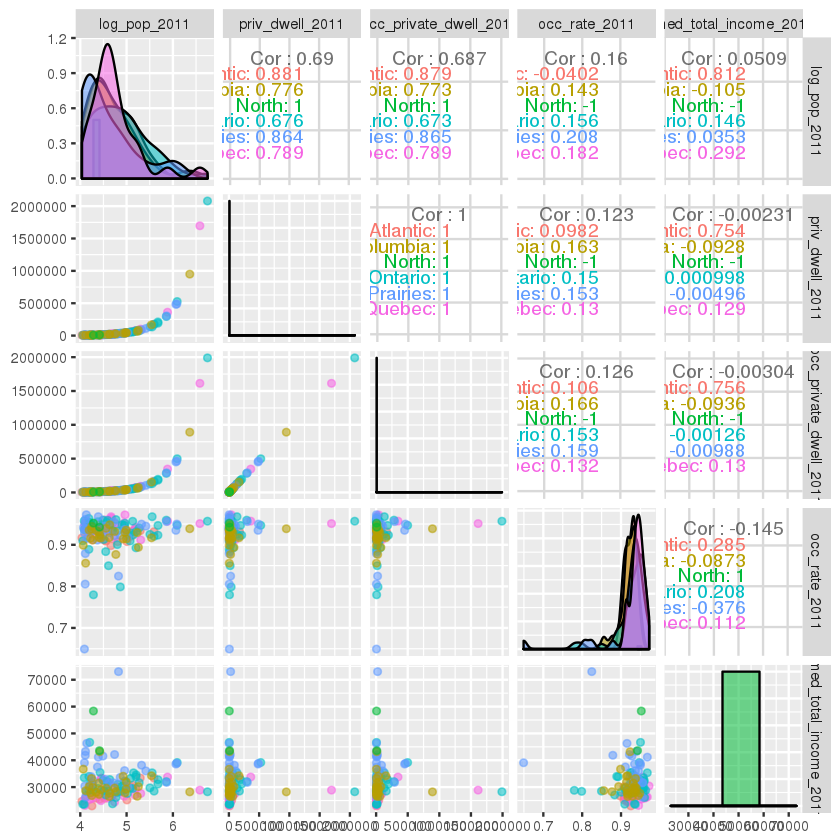

In [19]:
ggpairs(can.2011, c(7,9,10,11,12), mapping = ggplot2::aes(colour = Region, alpha=0.4), diag = list(continuous = wrap("densityDiag")))

Meh... not that great. There are some interesting tidbits, but nothing jumps as being meaningful beyond a first pass.

Can anything else be derived using bubble charts? We use `median income` as the radius for the bubbles, and focus on occupancy rates and population.  

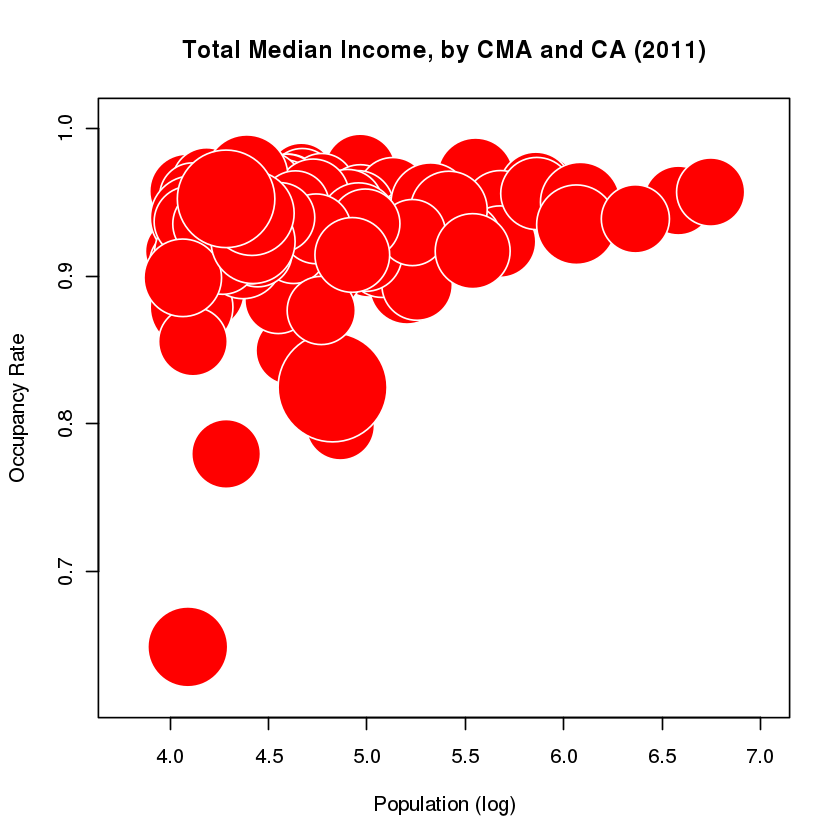

In [20]:
radius.med.income.2011<-sqrt(can.2011$med_total_income_2011/pi)
symbols(can.2011$log_pop_2011, can.2011$occ_rate_2011, circles=radius.med.income.2011, inches=0.45, fg="white", bg="red", xlab="Population (log)", ylab="Occupancy Rate")
title("Total Median Income, by CMA and CA (2011)")

Clearly, an increase in population seems to be associated with (and not necessarily a cause of) a rise in occupancy rates. But the median income seems to have very little correlation with either of the other two variables. Perhaps such a correlation is hidden by the default unit used to draw the bubbles? Let's shrink it from 0.45 to 0.25 and see if anything pops out. 

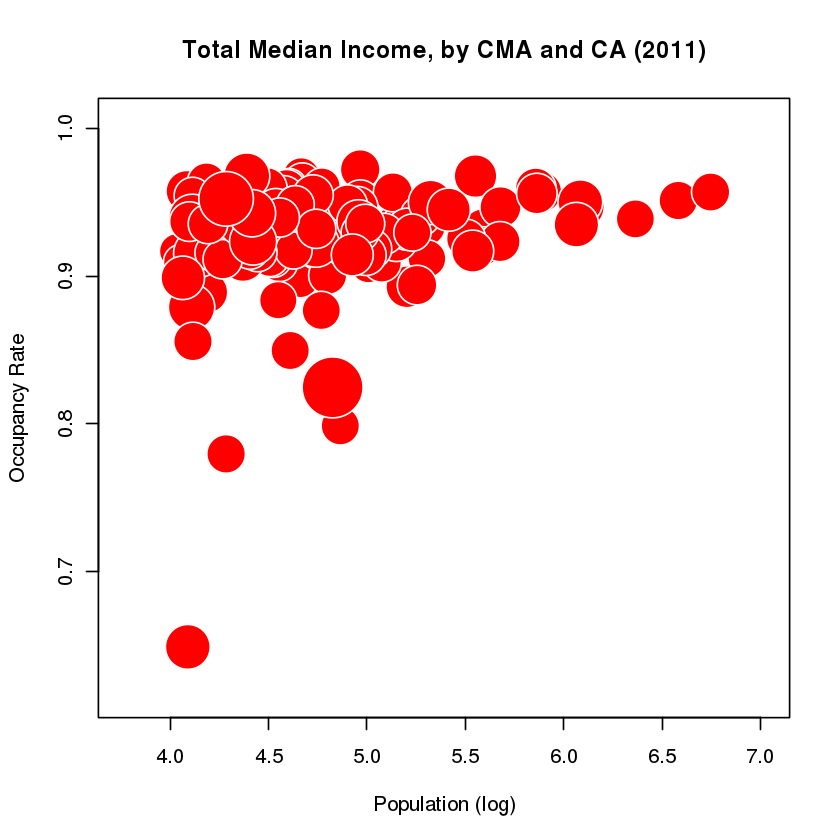

In [21]:
symbols(can.2011$log_pop_2011, can.2011$occ_rate_2011, circles=radius.med.income.2011, inches=0.25, fg="white", bg="red", xlab="Population (log)", ylab="Occupancy Rate")
title("Total Median Income, by CMA and CA (2011)")

Nope. But surely there would be a relationship in these quantities if we included the CMA/CA's region? 

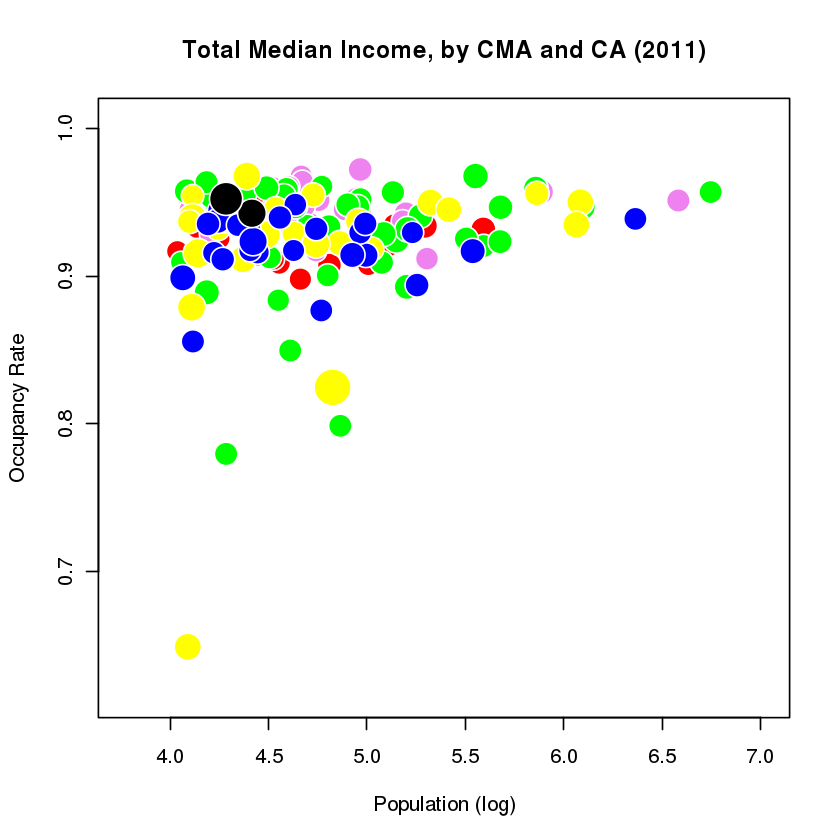

In [22]:
symbols(can.2011$log_pop_2011, can.2011$occ_rate_2011, circles=radius.med.income.2011, inches=0.15, fg="white", bg=c("red","blue","black","green","yellow","violet")[can.2011$Region], xlab="Population (log)", ylab="Occupancy Rate")
title("Total Median Income, by CMA and CA (2011)")

What do you think? 

While we're at it, can you identify the regions without the legend? 

---
### 3.2 Canadian 2011 CMA demographic dataset <a name=cma></a>

Perhaps the CA distort the full picture (given that they are small and more numerous). Let's analyze the world of CMAs instead. 

In [23]:
can.2011.CMA=read.csv("Data/Canada2011_CMA.csv", head=TRUE) # import the data
#head(can.2011.CMA)
str(can.2011.CMA) # see the dataset's structure (notice the number of observations)
summary(can.2011.CMA[,3:12], maxsum=13) # feature by feature distribution

'data.frame':	33 obs. of  15 variables:
 $ Geographic.code       : int  1 205 305 310 408 421 433 442 462 505 ...
 $ Geographic.name       : Factor w/ 33 levels "Abbotsford - Mission",..: 26 8 14 22 21 19 24 29 15 17 ...
 $ Province              : Factor w/ 9 levels "AB","BC","MB",..: 5 6 4 4 8 8 8 8 8 7 ...
 $ Region                : Factor w/ 5 levels "Atlantic","British Columbia",..: 1 1 1 1 5 5 5 5 5 3 ...
 $ Type                  : Factor w/ 1 level "CMA": 1 1 1 1 1 1 1 1 1 1 ...
 $ pop_2011              : int  196966 390328 138644 127761 157790 765706 201890 151773 3824221 1236324 ...
 $ log_pop_2011          : num  5.29 5.59 5.14 5.11 5.2 ...
 $ fem_pop_2011          : int  103587 204579 70901 65834 79770 394935 104026 78105 1971520 647083 ...
 $ prop_fem_2011         : num  52.6 52.4 51.1 51.5 50.6 ...
 $ pop_rank_2011         : int  20 13 29 31 26 7 19 27 2 4 ...
 $ priv_dwell_2011       : int  84542 177295 62403 56775 73766 361447 99913 74837 1696210 526627 ...
 $ occ_private

 Province              Region    Type       pop_2011        log_pop_2011  
 AB: 2    Atlantic        : 4   CMA:33   Min.   : 118975   Min.   :5.075  
 BC: 4    British Columbia: 4            1st Qu.: 159561   1st Qu.:5.203  
 MB: 1    Ontario         :15            Median : 260600   Median :5.416  
 NB: 2    Prairies        : 5            Mean   : 700710   Mean   :5.553  
 NL: 1    Quebec          : 5            3rd Qu.: 721053   3rd Qu.:5.858  
 NS: 1                                   Max.   :5583064   Max.   :6.747  
 ON:15                                                                    
 QC: 5                                                                    
 SK: 2                                                                    
  fem_pop_2011     prop_fem_2011   pop_rank_2011 priv_dwell_2011  
 Min.   :  63260   Min.   :50.55   Min.   : 1    Min.   :  53730  
 1st Qu.:  83243   1st Qu.:51.55   1st Qu.: 9    1st Qu.:  72817  
 Median : 135561   Median :52.17   Median :17    

We can use the median income for the bubbles radius again, but this time we'll look at population and unemployment.

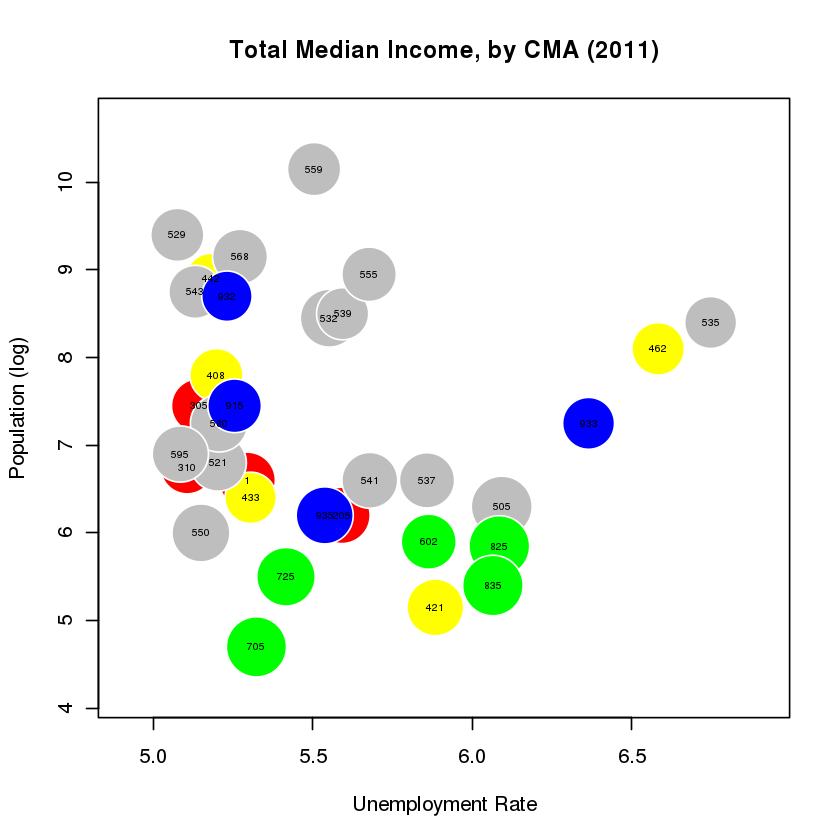

In [24]:
radius.med.income.2011.CMA<-sqrt(can.2011.CMA$med_total_income_2011/pi)
symbols(can.2011.CMA$log_pop_2011, can.2011.CMA$med_unemployment_2011, circles=radius.med.income.2011.CMA, inches=0.25, fg="white", bg=c("red","blue","gray","green","yellow")[can.2011.CMA$Region], ylab="Population (log)", xlab="Unemployment Rate")
title("Total Median Income, by CMA (2011)")
text(can.2011.CMA$log_pop_2011, can.2011.CMA$med_unemployment_2011,can.2011.CMA$Geographic.code, cex=0.5)

Part of the issue is that median income seems to be roughly uniform among CMAs. What if we used rank statistics instead? Switch the radius to population rank, say?

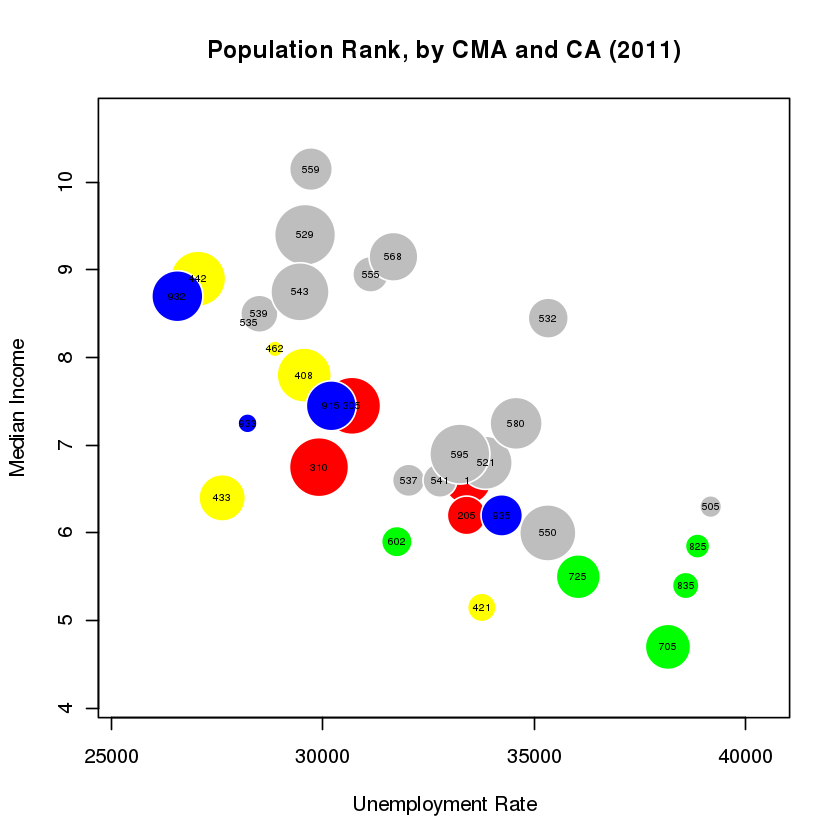

In [25]:
radius.pop.rank.2011.CMA<-sqrt(can.2011.CMA$pop_rank_2011/pi)
symbols(can.2011.CMA$med_total_income_2011, can.2011.CMA$med_unemployment_2011, circles=radius.pop.rank.2011.CMA, inches=0.25, fg="white", bg=c("red","blue","gray","green","yellow")[can.2011.CMA$Region], ylab="Median Income", xlab="Unemployment Rate")
title("Population Rank, by CMA and CA (2011)")
text(can.2011.CMA$med_total_income_2011, can.2011.CMA$med_unemployment_2011,can.2011.CMA$Geographic.code, cex=0.5)

There's a bit more structure here, isn't there?

---
[Back to top](#top)
## 4. ALGAE BLOOMS<a name=algae></a>

The ability to monitor and perform early forecasts of various river algae blooms is crucial to  control the ecological harm they can cause.   

The dataset which is used to train the learning model consists of:
- chemical properties of various water samples of European rivers
- the quantity of seven algae in each of the samples, and 
- the characteristics of the collection process for each sample.  

**Notes:** 
- we have already cleaned this dataset in notebook DS 02, but it would have made more sense to visualize it beforehand... we will revisit the process in detail in notebook DS 07. For now, let's just focus on producing some graphs.  
- The dataset is stored in the CSV file `algae_blooms.csv` (in the same directory as this notebook).

In [26]:
algae_blooms<-read.csv("Data/algae_blooms.csv", sep=",", header=TRUE)

We can get an idea of the data frame's structure by calling the `str` function.  

In [27]:
str(algae_blooms)

'data.frame':	340 obs. of  18 variables:
 $ season: Factor w/ 4 levels "autumn","spring",..: 4 2 1 2 1 4 3 1 4 4 ...
 $ size  : Factor w/ 3 levels "large","medium",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ speed : Factor w/ 3 levels "high","low","medium": 3 3 3 3 3 1 1 1 3 1 ...
 $ mxPH  : num  8 8.35 8.1 8.07 8.06 8.25 8.15 8.05 8.7 7.93 ...
 $ mnO2  : num  9.8 8 11.4 4.8 9 13.1 10.3 10.6 3.4 9.9 ...
 $ Cl    : num  60.8 57.8 40 77.4 55.4 ...
 $ NO3   : num  6.24 1.29 5.33 2.3 10.42 ...
 $ NH4   : num  578 370 346.7 98.2 233.7 ...
 $ oPO4  : num  105 428.8 125.7 61.2 58.2 ...
 $ PO4   : num  170 558.8 187.1 138.7 97.6 ...
 $ Chla  : num  50 1.3 15.6 1.4 10.5 ...
 $ a1    : num  0 1.4 3.3 3.1 9.2 15.1 2.4 18.2 25.4 17 ...
 $ a2    : num  0 7.6 53.6 41 2.9 14.6 1.2 1.6 5.4 0 ...
 $ a3    : num  0 4.8 1.9 18.9 7.5 1.4 3.2 0 2.5 0 ...
 $ a4    : num  0 1.9 0 0 0 0 3.9 0 0 2.9 ...
 $ a5    : num  34.2 6.7 0 1.4 7.5 22.5 5.8 5.5 0 0 ...
 $ a6    : num  8.3 0 0 0 4.1 12.6 6.8 8.7 0 0 ...
 $ a7    : num

Evidently, `algae_blooms` is a data frame with 340 observations of 18 variables each. 

---
Basic histograms can be constructed with the `hist` function. 



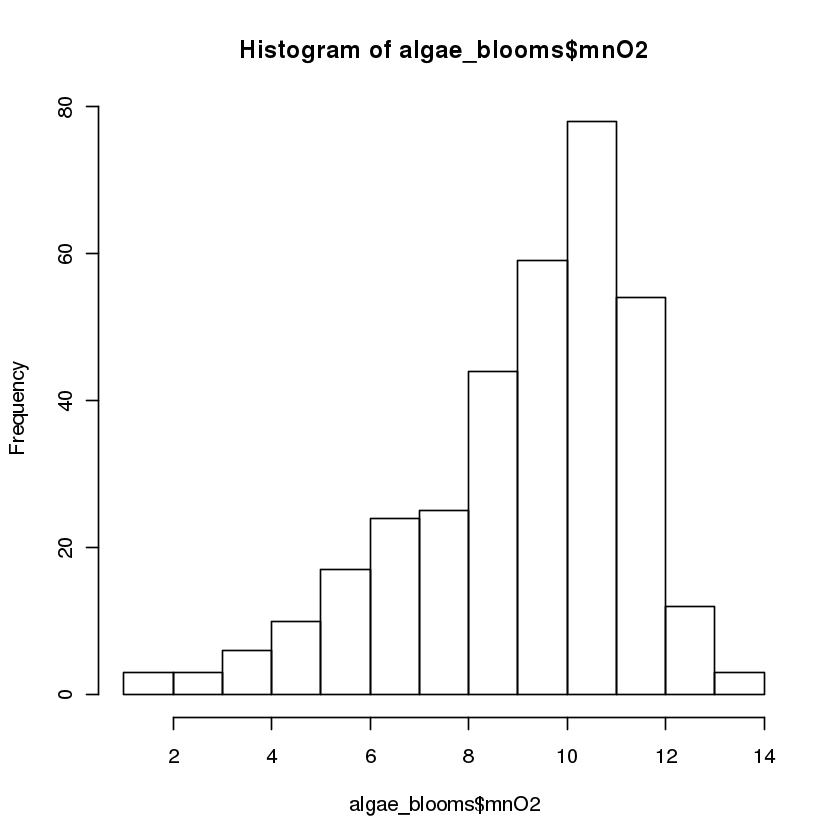

In [28]:
hist(algae_blooms$mnO2)

This basic histogram can be spruced up by using Hadley Wickham's (in)famous `ggplot2` library. 



In [29]:
library(ggplot2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing non-finite values (stat_density).”

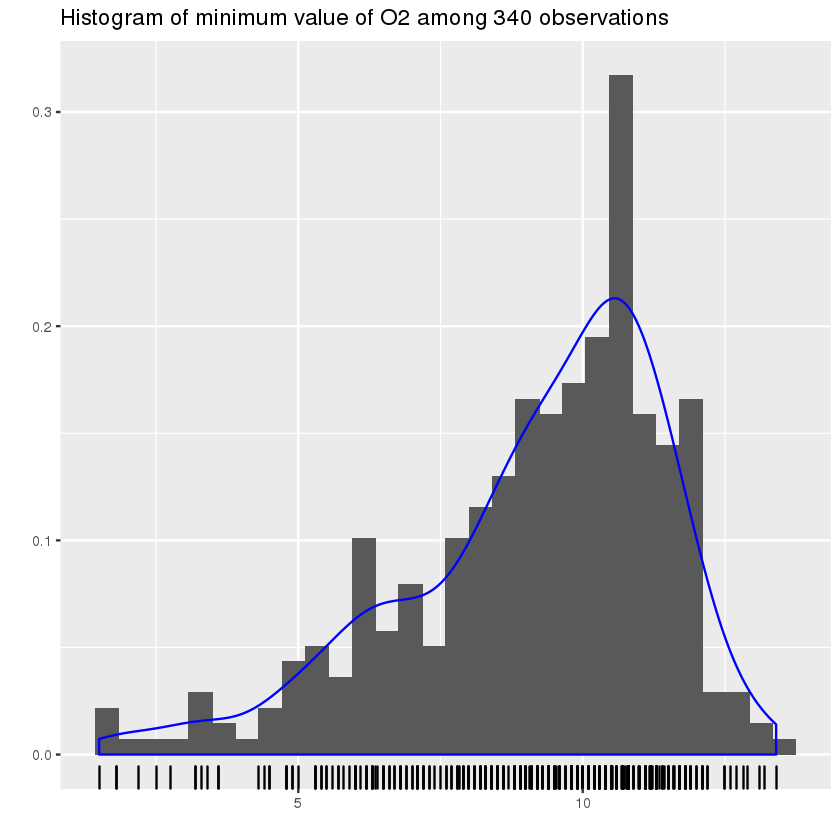

In [30]:
ggplot(algae_blooms,aes(x=mnO2)) +        # plotting mnO2 from the algae_blooms dataset ...
    geom_histogram(aes(y=..density..)) +  # as a histogram, where the vertical axis is the density ... 
    geom_density(color="blue") +          # on which will be layered a blue density curve ... 
    geom_rug() +                          # and a rug (or comb) showing where the observations actually fall...
    ggtitle("Histogram of minimum value of O2 among 340 observations") + # with this title ... 
    xlab("") +                                                           # no x axis label ...   
    ylab("")                                                             # and no y axis label

Let's do the same for `a1`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


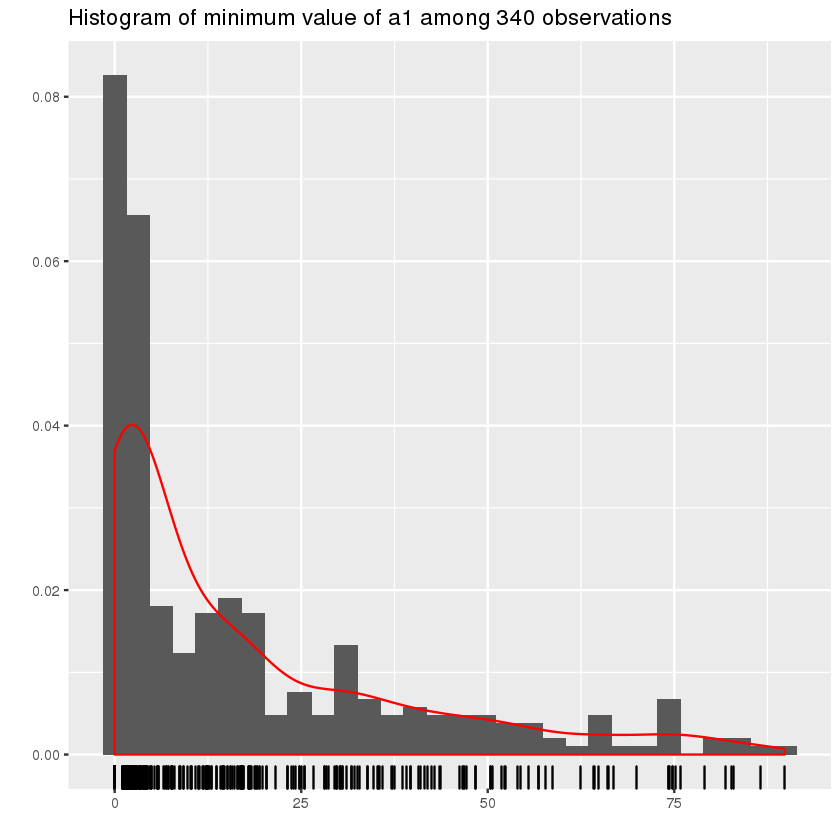

In [31]:
ggplot(algae_blooms,aes(x=a1)) + 
    geom_histogram(aes(y=..density..)) +
    geom_density(color="red") + 
    geom_rug() +
    ggtitle("Histogram of minimum value of a1 among 340 observations") + 
    xlab("") +
    ylab("")

$qq-$plots, another traditional statistical plot, can be produced with the `car` libary's `qqPlot` function. 

In [32]:
library(car)

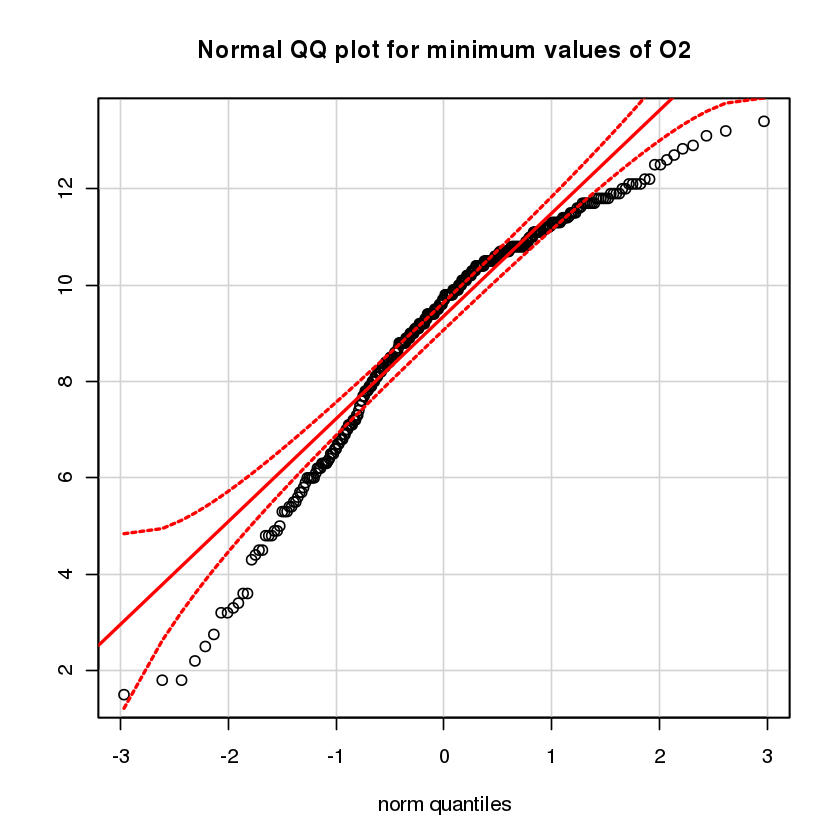

In [33]:
qqPlot(algae_blooms$mnO2, main='Normal QQ plot for minimum values of O2', ylab="")

Again, we can see that the normal distribution is not a good fit for `mnO2`, but that it is even worse for `a1` (see below).

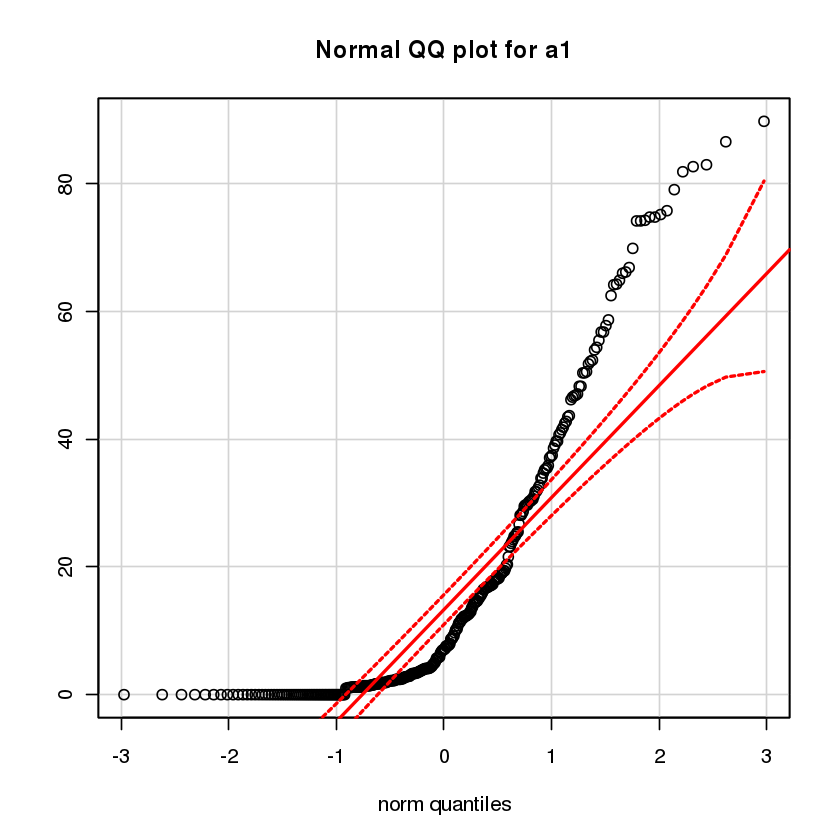

In [34]:
qqPlot(algae_blooms$a1, main='Normal QQ plot for a1', ylab="")

Now let's take a look at some plots involving `NH4`.

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”

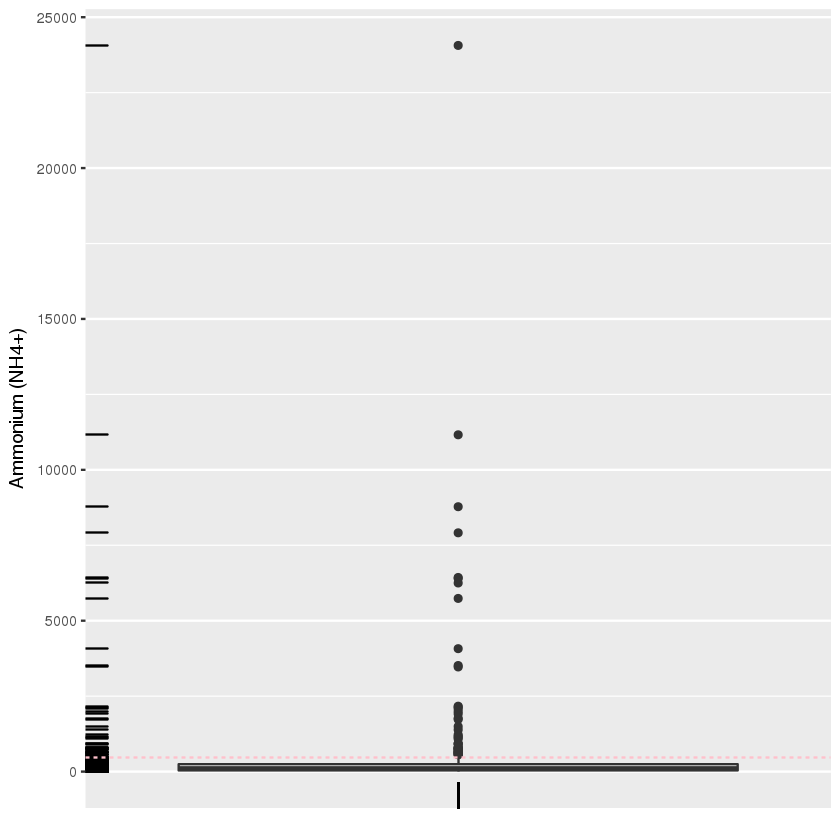

In [35]:
ggplot(algae_blooms,aes(x=factor(0),y=NH4)) +   # plotting NH4 from the algae_blooms dataset ...
    geom_boxplot() +                            # as a boxplot ... 
    geom_rug() +                                # with a rug on which the true values are shown ...
    geom_hline(aes(yintercept=mean(algae_blooms$NH4, na.rm=TRUE)), linetype=2, colour="pink") + # and a horizontal line showing where the mean NH4 value falls ...
    ylab("Ammonium (NH4+)") +                   
    xlab("") +
    scale_x_discrete(breaks=NULL)

We don't see much here because of the suspected outliers. 

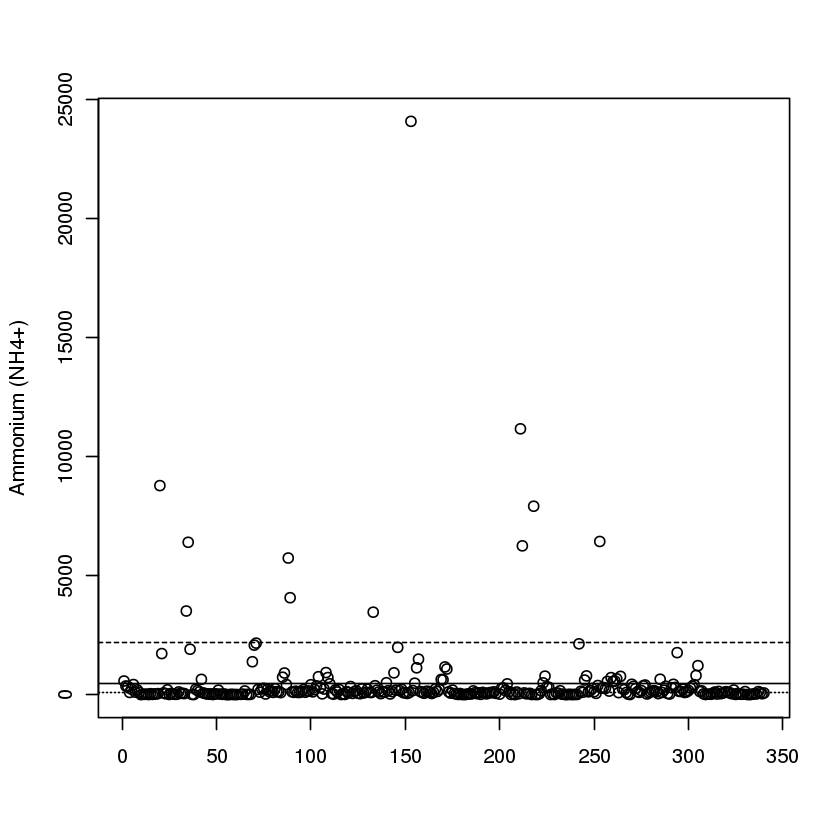

In [36]:
plot(algae_blooms$NH4, xlab="", ylab="Ammonium (NH4+)") # scatter plot of NH4 against observation number
abline(h=mean(algae_blooms$NH4, na.rm=TRUE), lty=1)     # mean value of NH4, solid line
abline(h=mean(algae_blooms$NH4, na.rm=TRUE) + sd(algae_blooms$NH4, na.rm=TRUE), lty=2) # mean + sd value of NH4, dashed line
abline(h=median(algae_blooms$NH4, na.rm=TRUE), lty=3)   # median value of NH4, tight dashed line We can also look at the data and see which observations have values of NH4 below 3000 (roughly all values below the long dashed line above)

Let's see what the boxplot above looks like without the suspected outliers.

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”

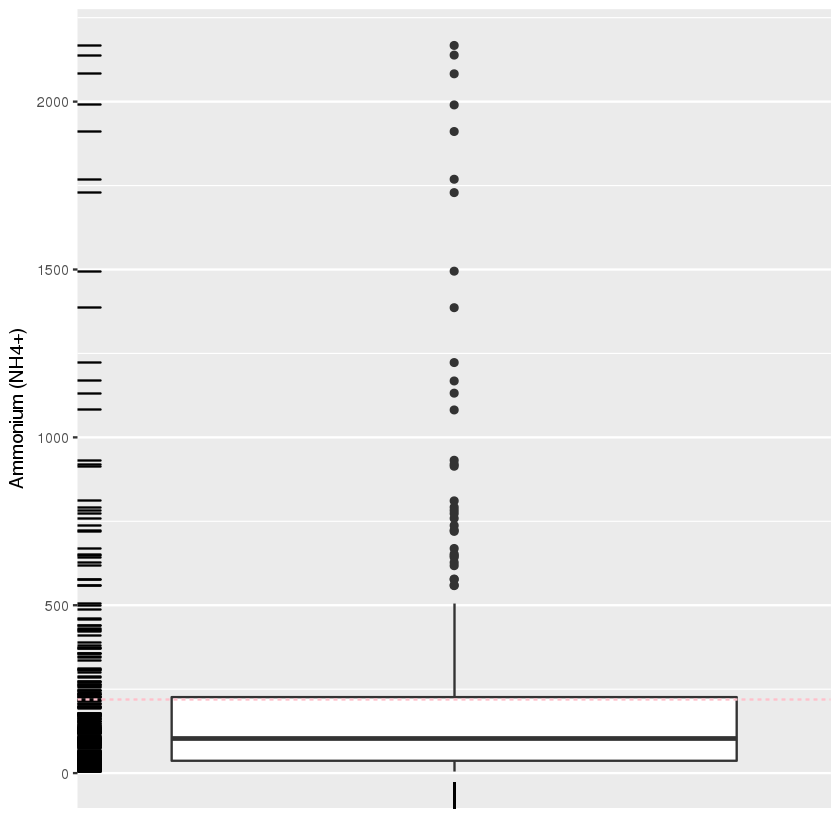

In [37]:
ggplot(algae_blooms[-which(algae_blooms$NH4>3000),],aes(x=factor(0),y=NH4)) + 
    geom_boxplot() + 
    geom_rug() +
    geom_hline(aes(yintercept=mean(algae_blooms[-which(algae_blooms$NH4>3000),8], na.rm=TRUE)), linetype=2, colour="pink") +
    ylab("Ammonium (NH4+)") +
    xlab("") +
    scale_x_discrete(breaks=NULL)

It's a bit better, to be sure (the box structure has expanded). There still seems to be a bit of very high values. Perhaps that's normal? How would we find out? 

Now let's take a look at some of the algae levels. 

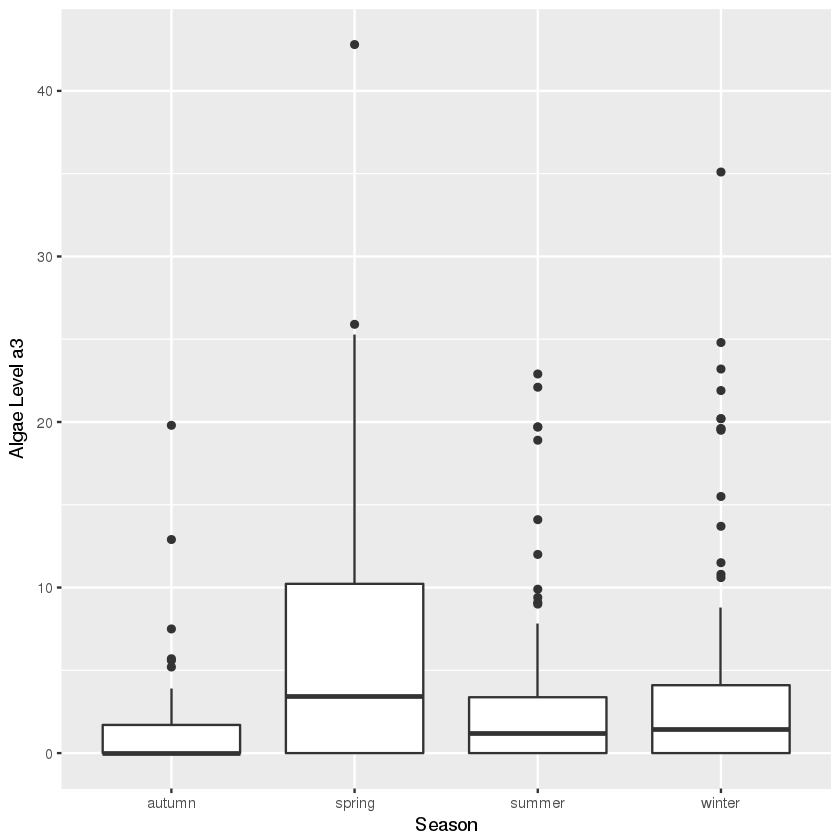

In [38]:
ggplot(algae_blooms,aes(x=season,y=a3)) +   # plot a3 by season ...
    geom_boxplot() +                        # in a series of boxplots ...
    xlab("Season") +                        # with x axis as Seasons and y axis as a3
    ylab("Algae Level a3")

We can re-arrange the factors' order, but it requires a bit of fancy footwork using the `forcats`'library `fct_relevel` function, and `dplyr`'s `mutate`.

In [39]:
library(forcats) # for fct_relevel
library(dplyr)   # for mutate


Attaching package: ‘dplyr’

The following object is masked from ‘package:car’:

    recode

The following object is masked from ‘package:GGally’:

    nasa

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [40]:
algae_blooms = mutate(algae_blooms, 
                     size=fct_relevel(size,c("small","medium","large")), # factors should appear in the desired order
                     speed=fct_relevel(speed,c("low","medium","high")),  # ditto
                     season=fct_relevel(season,c("spring","summer","autumn","winter")) # same here
                     )

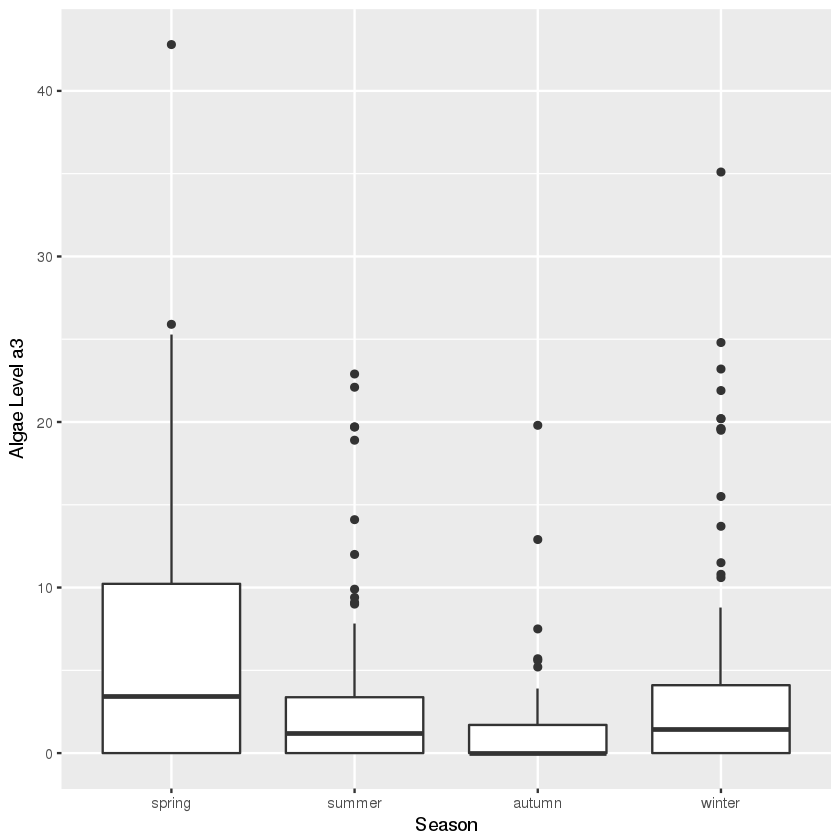

In [41]:
ggplot(algae_blooms,aes(x=season,y=a3)) + 
    geom_boxplot() +
    xlab("Season") +
    ylab("Algae Level a3")

**Violin plots** are cousins to the boxplots. Can we get a bit more insight on the `a3` trend?

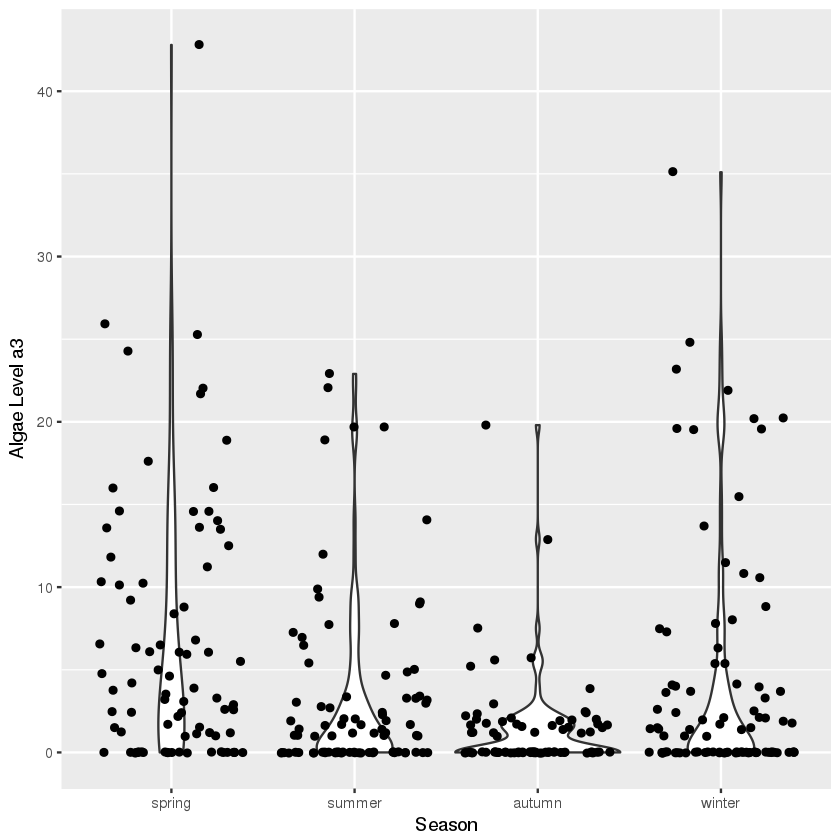

In [42]:
ggplot(algae_blooms,aes(x=season,y=a3)) +  # plot a3 by season ...
    geom_violin() +                        # in a series of violin plots ...  
    geom_jitter() +                        # with some jitter to avoid all the points being on top of one another ...
    xlab("Season") + 
    ylab("Algae Level a3")

(What happens if you turn off the jitter option?)

Let's take a look at both `NH4` and `season`. 

We only keep the observations for which `NH4`$> 3000$, and we bin them with respect to the **quartiles**.

---

In [43]:
f.NH4.data <- filter(algae_blooms,!is.na(NH4)) %>% 
    filter(NH4<3000) %>% 
    mutate(q.NH4=cut(NH4,quantile(NH4,c(0,0.25,0.5,0.75,1)), include.lowest=TRUE))
table(f.NH4.data$q.NH4,useNA="ifany")


      [5,36.8]     (36.8,103]      (103,226] (226,2.17e+03] 
            82             82             81             82 

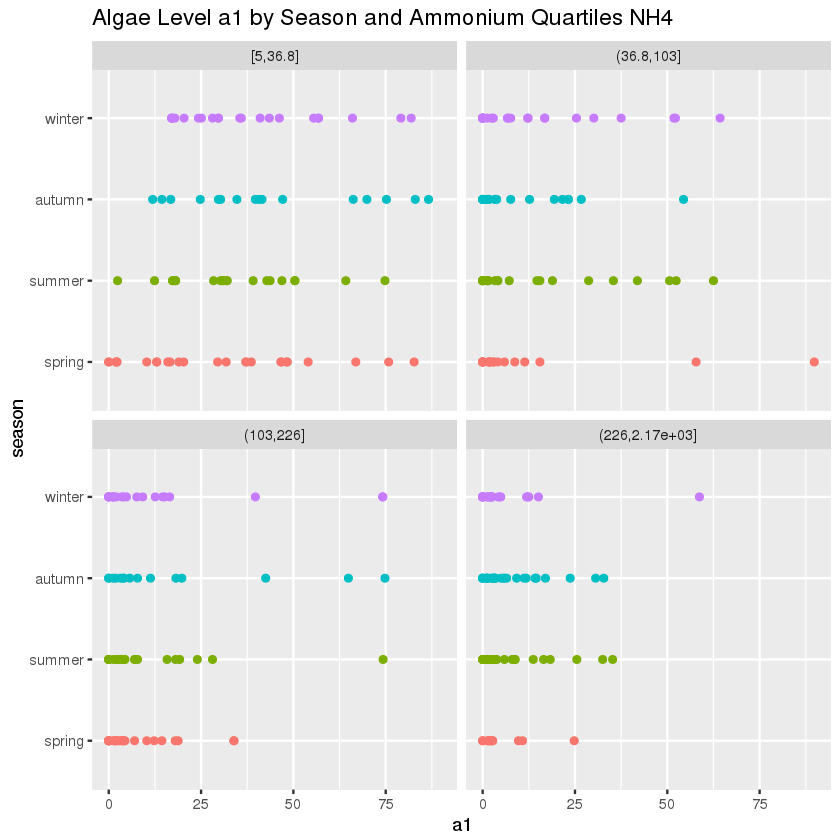

In [44]:
ggplot(f.NH4.data,aes(x=a1,y=season,color=season)) +
    geom_point() +
    facet_wrap(~q.NH4) +
    guides(color=FALSE) +
    ggtitle("Algae Level a1 by Season and Ammonium Quartiles NH4")

---
[Back to top](#top)
## 5. OTHER VISUALIZATION METHODS <a name=others></a>

1. Heat Maps
 - http://sebastianraschka.com/Articles/heatmaps_in_r.html
 - http://www.r-bloggers.com/visualising-thefts-using-heatmaps-in-ggplot2
 - https://stat.ethz.ch/R-manual/R-devel/library/stats/html/heatmap.html (uses stats library)
2. Geographical Maps 
 - http://www.molecularecologist.com/2012/09/making-maps-with-r
 - http://www.r-bloggers.com/create-maps-with-maptools-r-package/ (uses maptools library)
 - https://procomun.wordpress.com/2012/02/18/maps_with_r_1/
 - https://www.nceas.ucsb.edu/scicomp/usecases/CreateMapsWithRGraphics
3. Word Clouds
 - https://georeferenced.wordpress.com/2013/01/15/rwordcloud/
 - https://cran.r-project.org/web/packages/wordcloud/wordcloud.pdf (uses wordcould library)
 - http://shiny.rstudio.com/gallery/word-cloud.html
4. Parallel Coordinates 
 - https://www.safaribooksonline.com/blog/2014/03/31/mastering-parallel-coordinate-charts-r/
 - http://rcharts.io/parcoords/
 - http://www.inside-r.org/packages/cran/GGally/docs/ggparcoord (uses GGally library)
5. Chernoff Faces
 - https://flowingdata.com/2010/08/31/how-to-visualize-data-with-cartoonish-faces/
 - http://www.inside-r.org/packages/cran/aplpack/docs/faces
 - https://www.safaribooksonline.com/library/view/r-data-visualization/9781783989508/ch07s05.html

---
__Additional References__
1. Scatterplots
 - http://www.statmethods.net/graphs/scatterplot.html
 - http://www.r-tutor.com/elementary-statistics/quantitative-data/scatter-plot
2. Histograms 
 - http://www.r-bloggers.com/how-to-make-a-histogram-with-basic-r/
 - http://www.r-bloggers.com/basics-of-histograms/
 - http://www.statmethods.net/graphs/density.html
3. ggplot2
 - http://ggplot2.org/
 - http://www.statmethods.net/advgraphs/ggplot2.html
 - http://www.noamross.net/blog/2012/10/5/ggplot-introduction.html